In [4]:
import matplotlib.pyplot as plt
import numpy as np
from Constants import Constants
import seaborn as sns
import deepdish as dd
import read_mist_models
import glob
from astropy.table import Table

import sys
sys.path.append('../RLOF/src')

from astropy.table import Table
from rlof import RLOF,CircumbinaryTorus

from astropy.io import ascii
lrn = ascii.read('lrn.txt')
print(lrn)

c=Constants()

%matplotlib inline


# set some global options
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 16

from importlib.metadata import version
from platform import python_version

print("python: ",python_version())

print("matplotlib: ",version('matplotlib'))
print("numpy: ",version('numpy'))
print("astropy:",version('astropy'))
print("pyshtools:",version('pyshtools'))
print("seaborn:",version('seaborn'))
print("deepdish:",version('deepdish'))
print("scipy:",version('scipy'))

     name        L90   t90  Ms    Rs     Ls      Teff  vobs
-------------- ------- --- ---- ----- -------- ------- ----
      V4332Sgr 1.3e+37  15  1.0   1.0      1.0  5800.0  200
       V838Mon 3.6e+39  79  8.0   5.0   7000.0 24000.0  500
      V1309Sco 8.9e+37  24  1.4   3.5      4.3  4500.0  150
NGC4490-OT2011 2.2e+41 180 30.0  62.0 130000.0 14000.0  800
    M31-OT2015 1.5e+39  50 4.25  35.0    600.0  5000.0  300
   M101-OT2015 1.4e+40 270 18.0 220.0  87000.0  7000.0  500
     SNHunt248 6.2e+40 130 30.0 500.0 400000.0  6500.0 1200
     AT2018bwo 1.3e+40  60 14.0 100.0  20000.0  6500.0  500
Constants defined...
python:  3.8.3
matplotlib:  3.3.2
numpy:  1.19.2
astropy: 4.2.1
pyshtools: 4.7.1
seaborn: 0.11.1
deepdish: 0.3.6
scipy: 1.5.0


# LRNe constraints on Thermodynamics

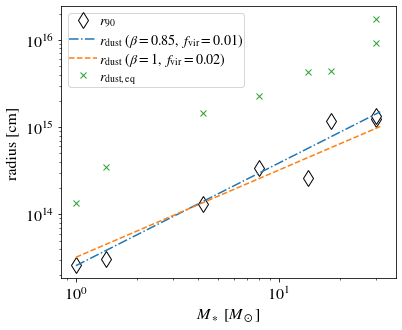

In [5]:
lrn['r90'] = lrn['vobs']*1.e5*lrn['t90']*86400. # cm

def rdustEq(L,Tdust=1e3):
    return np.sqrt(L/(4*np.pi*c.sigmaSB*Tdust**4))

def rdustrej(Ms,fvir=0.2,rej=16*c.rsun,beta=1,Tdust=1000):
    mu=1
    T0 = fvir*mu*c.mp/c.kB * c.G*Ms/rej
    return (Tdust/T0)**(-1/beta) * rej

plt.loglog(lrn['Ms'],lrn['r90'],'kd',label=r'$r_{90}$',markersize=12,markeredgecolor='k',markerfacecolor='w')

xp = np.logspace(0,1.5,10)
plt.loglog(xp,rdustrej(xp*c.msun,beta=0.85,fvir=0.01),"-.",label=r'$r_{\rm dust}\ (\beta=0.85,\ f_{\rm vir}=0.01$)')
plt.loglog(xp,rdustrej(xp*c.msun,beta=1,fvir=0.02),"--",label=r'$r_{\rm dust}\ (\beta=1,\ f_{\rm vir}=0.02$)')

plt.loglog(lrn['Ms'],rdustEq(lrn['L90']),'x',label=r'$r_{\rm dust,eq}$')

plt.legend()
plt.ylabel(r'radius [cm]')
plt.xlabel(r'$M_\ast\  [M_\odot]$')
plt.savefig('dustfigs/r90.pdf',bbox_inches='tight')

# Get data from MIST tracks

In [18]:
# GET ZAMS / TAMS on HRD
filelist = sorted(glob.glob('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/[0-9][0-9][0-9][0-9]0M.track.eep'))[2:]

zams = []
tams = []
rmax = []
for fn in filelist:
    eep = read_mist_models.EEP(fn)
    sel = eep.eeps['phase']==0
    zams.append([eep.eeps[sel]['log_Teff'][0],eep.eeps[sel]['log_L'][0],eep.eeps[sel]['star_mass'][0],eep.eeps[sel]['log_R'][0] ])
    tams.append([eep.eeps[sel]['log_Teff'][-1],eep.eeps[sel]['log_L'][-1],eep.eeps[sel]['star_mass'][-1],eep.eeps[sel]['log_R'][-1] ])
    
    sel = (eep.eeps['phase']>=0)& (eep.eeps['phase']<6) # MS -> AGB
    imax = np.argmax(eep.eeps[sel]['log_R'])
    rmax.append([eep.eeps[sel]['log_Teff'][imax],eep.eeps[sel]['log_L'][imax],eep.eeps[sel]['star_mass'][imax],eep.eeps[sel]['log_R'][imax] ])
    
zams = Table(np.array(zams),names=['log_Teff','log_L','star_mass','log_R'])
tams = Table(np.array(tams),names=['log_Teff','log_L','star_mass','log_R'])
rmax = Table(np.array(rmax),names=['log_Teff','log_L','star_mass','log_R'])

dd.io.save('zams.h5',zams)
dd.io.save('tams.h5',tams)
dd.io.save('rmax.h5',rmax)

Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00030M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00040M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00050M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00060M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00070M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00080M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00090M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00110M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00120M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00130M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00140M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00150M.track.eep
Reading in: 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


In [7]:
def Av_torus(Ms,Rs,Ma,kappa_dust = 1.e3,X_dust_max=1.e-2,
            tfinal=None,mu=1.):
    r = RLOF(Md0=Ms,
             Ma0=Ma,
             Rd0=Rs,
             Ra0=0.0,
             Ggrav=6.674e-8,
             a0_mode='Roche_limit_fraction',
             f_roche_limit=0.999,
             gamma_adiabatic=5./3.,
             gamma_structure=5./3.,
             fcorot0=1.0,
             verbose=False)

    if(tfinal):
        tmax = tfinal
    else:
        tmax = 3e5*2*np.pi*np.sqrt(Rs**3/(c.G*Ms))
    sol = r.integrate(tmax,Ntimes=1000001)
    ct = CircumbinaryTorus(sol)
    
    rp = np.logspace(np.log10(Rs),np.log10(100*Rs),1000)
    T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
    X_dust = np.where(T<1.e3,X_dust_max,0)
    dtau = np.gradient(rp)*ct.rho_torus(rp,0)*kappa_dust*X_dust 
    tau = np.flip(np.cumsum(np.flip(dtau)))
    return 1.086*tau[0]




def Av_wind(Ms,Rs,Ma,kappa_dust=1.e2,X_dust_max=1.e-3,
           vwf = 0.25,fvir=0.25,
           tfinal=None,mu=1.):
    r = RLOF(Md0=Ms,
             Ma0=Ma,
             Rd0=Rs,
             Ra0=0.0,
             Ggrav=6.674e-8,
             a0_mode='Roche_limit_fraction',
             f_roche_limit=0.999,
             gamma_adiabatic=5./3.,
             gamma_structure=5./3.,
             fcorot0=1.0,
             verbose=False)
    
    if(tfinal):
        tmax = tfinal
    else:
        tmax = 3e5*2*np.pi*np.sqrt(Rs**3/(c.G*Ms))

    sol = r.integrate(tmax,Ntimes=1000001)

    deltat = sol['t'][-1] - sol['t']
    vw = vwf*np.sqrt(2*c.G*Ms/Rs)
    rp = Rs + vw*deltat

    Tvir = mu * c.mp / c.kB * c.G*Ms/Rs
    T = fvir*Tvir *(rp/Rs)**-1
    rhow = - sol['dMddt'] / (4*np.pi*vw*rp**2 )


    X_dust = np.where(T<1.e3,X_dust_max,0)
    dtau = -np.gradient(rp)*rhow*kappa_dust*X_dust
    tau = np.cumsum(dtau)
    
    #plt.loglog(rp,dtau)
    #plt.loglog(rp,tau)
    return 1.086*tau[-1]

Av_torus = np.vectorize(Av_torus)
Av_wind = np.vectorize(Av_wind)

Ms = c.msun
Rs = 10*c.rsun
q = 1/3.
print("A_v (torus)=",Av_torus(Ms,Rs,q*Ms,kappa_dust=1.e3,X_dust_max=5.e-3) )
print("A_v (wind) =", Av_wind(Ms,Rs,q*Ms,kappa_dust=1.e3,X_dust_max=5.e-3,vwf=0.25,fvir=0.25) )




Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97971174e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1696666085938590.0
 GM =  1.6573837377284865e+26
 gamma = 1.3333333333333333
 l =  1.4536692436534995e+19
 R0 =  68860397755199.38
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97971174e+10])]
--------------------------------


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1696666085938590.0
 GM =  1.6573837377284865e+26
 gamma = 1.3333333333333333
 l =  1.4536692436534995e+19
 R0 =  68860397755199.38
A_v (torus)= 1.2068948185809998
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97971174e+10])]
--------------------------------
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB


---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97971174e+10])]
--------------------------------
A_v (wind) = 3.1559201061951594


# $A_V$ As a function of time

In [8]:
Ms = c.msun
Rs = 30*c.rsun
Ma = 1/3.*c.msun

r = RLOF(Md0=Ms,
         Ma0=Ma,
         Rd0=Rs,
         Ra0=0.0,
         Ggrav=6.674e-8,
         a0_mode='Roche_limit_fraction',
         f_roche_limit=0.999,
         gamma_adiabatic=5./3.,
         gamma_structure=5./3.,
         fcorot0=1.0,
         verbose=False)

sol = r.integrate(3e5*2*np.pi*np.sqrt(Rs**3/(c.G*Ms)),Ntimes=1000001)

sol['dt']=sol['t'][-1]-sol['t']


dtl = np.logspace(0,4,10)*86400.
tl = sol['t'][-1] - dtl  # Take the final time from the standard output

Avtl = Av_torus(Ms,Rs,Ma,kappa_dust=1.e3,X_dust_max=5.e-3,tfinal=tl)
Avwl = Av_wind(Ms,Rs,Ma,kappa_dust=1.e3,X_dust_max=5.e-3,vwf=0.25,fvir=0.25,tfinal=tl) 

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.0678624e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1852678217660390.2
 GM =  1.6831604885364585e+26
 gamma = 1.3333333333333333
 l =  2.6113905202452685e+19
 R0 =  206581193265598.12
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1852678217660390.2
 GM =  1.6831604885364585e+26
 gamma = 1.3333333333333333
 l =  2.6113905202452685e+19
 R0 =  206581193265598.12
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1903580157849197.5
 GM =  1.6898904828341538e+26
 gamma = 1.3333333333333333
 l =  2.636548252902672e+19
 R0 =  206581193265598.12
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2017315490795339.2
 GM =  1.7026379549225137e+26
 gamma = 1.3333333333333333
 l =  2.6850535718750392e+19
 R0 =  206581193265598.12
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2228323066692320.2
 GM =  1.720010923456872e+26
 gamma = 1.3333333333333333
 l =  2.7530018924106785e+19
 R0 =  206581193265598.12
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2551327033343985.0
 GM =  1.736717118333148e+26
 gamma = 1.3333333333333333
 l =  2.8204097772779667e+19
 R0 =  206581193265598.12
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2983818744903905.0
 GM =  1.7492066748156936e+26
 gamma = 1.3333333333333333
 l =  2.8721691550126424e+19
 R0 =  206581193265598.12
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3525158299542346.0
 GM =  1.7573863193772327e+26
 gamma = 1.3333333333333333
 l =  2.906716057743654e+19
 R0 =  206581193265598.12
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4185468271805022.5
 GM =  1.7624492821463605e+26
 gamma = 1.3333333333333333
 l =  2.9283612541290836e+19
 R0 =  206581193265598.12
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

Torus Params: 
 K =  4987059106324043.0
 GM =  1.765516755222926e+26
 gamma = 1.3333333333333333
 l =  2.94157368005324e+19
 R0 =  206581193265598.12
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5967391166415742.0
 GM =  1.76736128742074e+26
 gamma = 1.3333333333333333
 l =  2.949554633049976e+19
 R0 =  206581193265598.12
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB


---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  The solver successfully reached the end of the integration interval.
events:  [array([], dtype=float64)]
---------

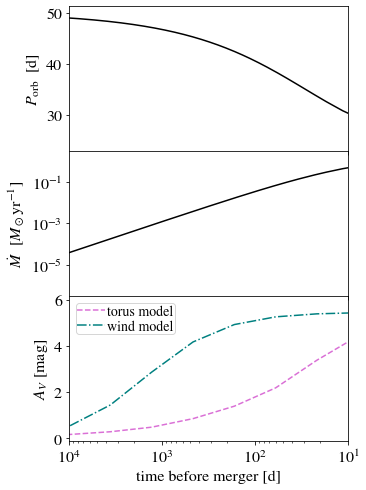

In [9]:
plt.figure(figsize=(5,8))

plt.subplot(311)
plt.semilogx(sol['dt']/86400,2*np.pi*np.sqrt(sol['a']**3/(c.G*(sol['Md']+sol['Ma'])))/86400.,'k-')
plt.xlim(1.e4,10)
plt.xticks(visible=False)
plt.ylabel(r'$P_{\rm orb}$  [d]')
#plt.ylim(0.9,2)


plt.subplot(312)
plt.loglog(sol['dt']/86400,-sol['dMddt']/(c.msun/c.yr),'k-' )
plt.xlim(1.e4,10)
plt.ylabel(r'$\dot M \ \ [M_\odot {\rm yr}^{-1}]$')
plt.xticks(visible=False)
plt.ylim(3.e-7,3.)

plt.subplot(313)
plt.ylabel(r'$A_V$ [mag]')
plt.xlabel(r'time before merger [d]')
plt.semilogx(dtl/86400,Avtl,'--',label='torus model',color='Orchid')
plt.semilogx(dtl/86400,Avwl,'-.',label='wind model',color='Teal')
plt.xlim(1.e4,10)
plt.legend()

plt.subplots_adjust(hspace=0)
plt.savefig('dustfigs/ts.pdf',bbox_inches='tight',dpi=200)

# M--R $A_V$

In [10]:
Rsl = np.logspace(-0.5,3.2,30)*c.rsun
Msl = np.logspace(-0.5,2,30)*c.msun
q = 1/3.

rr,mm = np.meshgrid(Rsl,Msl)

Avt = Av_torus(mm,rr,q*mm,kappa_dust=1.e3,X_dust_max=5.e-3) 
Avw = Av_wind(mm,rr,q*mm,kappa_dust=1.e3,X_dust_max=5.e-3,vwf=0.25,fvir=0.25) 


# SAVE
Avq = {'mm':mm,'rr':rr,'Avt':Avt,'Avw':Avw}
dd.io.save('Avq.h5',Avq)

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97969392e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  802377439631317.4
 GM =  5.260138134417836e+25
 gamma = 1.3333333333333333
 l =  1.466055439002348e+18
 R0 =  2177556974915.7583
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97969392e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  802377439631317.4
 GM =  5.260138134417836e+25
 gamma = 1.3333333333333333
 l =  1.466055439002348e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.18345823e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  839846337936297.4
 GM =  5.302659872813511e+25
 gamma = 1.3333333333333333
 l =  1.7306488338778767e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.60754651e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  809058641603442.4
 GM =  5.268272986011474e+25
 gamma = 1.3333333333333333
 l =  1.9738512947921132e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.49276105e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  746976533417369.9
 GM =  5.181742241071671e+25
 gamma = 1.3333333333333333
 l =  2.19992459934281e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.31937229e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  845531807800895.8
 GM =  5.308494408122484e+25
 gamma = 1.3333333333333333
 l =  2.696037049142226e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.60368717e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  781489366985072.1
 GM =  5.232987639361e+25
 gamma = 1.3333333333333333
 l =  3.01898961411672e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.59921894e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  783950344218172.2
 GM =  5.236327931183885e+25
 gamma = 1.3333333333333333
 l =  3.501871203219409e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.69978683e+09])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  753333219108162.1
 GM =  5.191832647490058e+25
 gamma = 1.3333333333333333
 l =  3.97665611766895e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.35172701e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  758733799482097.2
 GM =  5.200164694492936e+25
 gamma = 1.3333333333333333
 l =  4.622885985906578e+18
 R0 =  22838058556353.42


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.10016787e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  786417112479618.4
 GM =  5.239637065292032e+25
 gamma = 1.3333333333333333
 l =  5.449029747146481e+18
 R0 =  30636940211462.824
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.26319004e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  748129963188041.4
 GM =  5.183596337503248e+25
 gamma = 1.3333333333333333
 l =  6.156238014500161e+18
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.07021155e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  784917320978674.6
 GM =  5.2376297447146035e+25
 gamma = 1.3333333333333333
 l =  7.303269263451485e+18
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.87779807e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  836582255942005.1
 GM =  5.29924113686996e+25
 gamma = 1.3333333333333333
 l =  8.694946422830103e+18
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.22401085e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  843347378475401.5
 GM =  5.306270570794797e+25
 gamma = 1.3333333333333333
 l =  1.0102528719126751e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  776285362023446.8
 GM =  5.225793822440918e+25
 gamma = 1.3333333333333333
 l =  1.1287828872245594e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.95486353e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  820450359707705.0
 GM =  5.281570884643585e+25
 gamma = 1.3333333333333333
 l =  1.3403170147777083e+19
 R0 =  178551141246162.62
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.59115419e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  816773268757701.1
 GM =  5.277355338967376e+25
 gamma = 1.3333333333333333
 l =  1.5494637059336507e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.13347309e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  799331286376332.4
 GM =  5.25634366679334e+25
 gamma = 1.3333333333333333
 l =  1.7778607293142925e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.10836201e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  826172247501929.8
 GM =  5.287989411450155e+25
 gamma = 1.3333333333333333
 l =  2.088502617573461e+19
 R0 =  431043649527039.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.72210733e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  853527040800645.9
 GM =  5.316448320299484e+25
 gamma = 1.3333333333333333
 l =  2.450047858998872e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.67566796e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  848749833595192.8
 GM =  5.311730512068125e+25
 gamma = 1.3333333333333333
 l =  2.8316973194114724e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.1573593e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  832745811434042.9
 GM =  5.295157019130934e+25
 gamma = 1.3333333333333333
 l =  3.2554376331664323e+19
 R0 =  1040590536139081.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.45947397e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  856936058443610.2
 GM =  5.319753205916629e+25
 gamma = 1.3333333333333333
 l =  3.812407041570833e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00364e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  803355623174106.4
 GM =  5.26134513483208e+25
 gamma = 1.3333333333333333
 l =  4.301557959710497e+19
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55940016e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  833913828513750.2
 GM =  5.2964080616173e+25
 gamma = 1.3333333333333333
 l =  5.060953084726531e+19
 R0 =  2512109075473793.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42285088e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  847571976289465.6
 GM =  5.310551520312941e+25
 gamma = 1.3333333333333333
 l =  5.8990531804956795e+19
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76455025e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  834862306850017.0
 GM =  5.297419037233079e+25
 gamma = 1.3333333333333333
 l =  6.7922774718290985e+19
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915605e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  811726149604138.5
 GM =  5.271450456574657e+25
 gamma = 1.3333333333333333
 l =  7.776044867073203e+19
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  771687925757338.4
 GM =  5.219287908025151e+25
 gamma = 1.3333333333333333
 l =  8.799513616016389e+19
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  758120755768457.4
 GM =  5.199229792291845e+25
 gamma = 1.3333333333333333
 l =  1.0101561477387079e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.60367438e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  956278355224594.2
 GM =  6.464293338674993e+25
 gamma = 1.3333333333333333
 l =  1.6485116352062e+18
 R0 =  2177556974915.7583
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.59921962e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  902344663569659.0
 GM =  6.396681340177006e+25
 gamma = 1.3333333333333333
 l =  1.8626040198319542e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.6997886e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  874863375755307.2
 GM =  6.355986919264464e+25
 gamma = 1.3333333333333333
 l =  2.125549107791101e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.35171959e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

Torus Params: 
 K =  959217961869227.1
 GM =  6.467570497195686e+25
 gamma = 1.3333333333333333
 l =  2.5644545369057014e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.10022994e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  947818241932923.5
 GM =  6.454643065558956e+25
 gamma = 1.3333333333333333
 l =  2.956128987748576e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.26319004e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  853981182135779.0
 GM =  6.321760928939895e+25
 gamma = 1.3333333333333333
 l =  3.2617699458804864e+18
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  895973456739100.0
 GM =  6.387658419045958e+25
 gamma = 1.3333333333333333
 l =  3.8695033613655204e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.87779807e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  954948405393698.8
 GM =  6.462797938429046e+25
 gamma = 1.3333333333333333
 l =  4.6068581404973716e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.22401085e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  962670686696812.0
 GM =  6.471370803267062e+25
 gamma = 1.3333333333333333
 l =  5.352639795030603e+18
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurre

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  886120324586257.9
 GM =  6.373223888242623e+25
 gamma = 1.3333333333333333
 l =  5.980649697937443e+18
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.95486353e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  936534039499727.2
 GM =  6.441247815425458e+25
 gamma = 1.3333333333333333
 l =  7.101424250383051e+18
 R0 =  41099032266892.445
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.59115419e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  932336629171450.2
 GM =  6.436106590986274e+25
 gamma = 1.3333333333333333
 l =  8.209549483264015e+18
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.13347309e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  912426942205102.2
 GM =  6.410481533225298e+25
 gamma = 1.3333333333333333
 l =  9.41966979606498e+18
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.10836201e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  943065538412250.4
 GM =  6.449075701757748e+25
 gamma = 1.3333333333333333
 l =  1.106554881658116e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.72210733e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  974290703779659.2
 GM =  6.483783347138497e+25
 gamma = 1.3333333333333333
 l =  1.2981130101332236e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  968837528084117.8
 GM =  6.478029592537096e+25
 gamma = 1.3333333333333333
 l =  1.50032296023351e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.1573593e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  950569223652701.9
 GM =  6.457817152329104e+25
 gamma = 1.3333333333333333
 l =  1.7248340692357239e+19
 R0 =  239523890594690.72
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.45947397e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  978182033238757.9
 GM =  6.487813864536508e+25
 gamma = 1.3333333333333333
 l =  2.0199340676510626e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00364e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  917020639456704.2
 GM =  6.41658112989204e+25
 gamma = 1.3333333333333333
 l =  2.2791017451075453e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55940016e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  951902426560300.1
 GM =  6.459342801608312e+25
 gamma = 1.3333333333333333
 l =  2.68145331399676e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42285088e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  967493091083893.6
 GM =  6.4765918068175885e+25
 gamma = 1.3333333333333333
 l =  3.1255053721005064e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  952985096313089.8
 GM =  6.460575750089837e+25
 gamma = 1.3333333333333333
 l =  3.598763825935158e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915605e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  926575474594626.0
 GM =  6.428905257577207e+25
 gamma = 1.3333333333333333
 l =  4.1199949961289515e+19
 R0 =  1395937836031080.2
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  880872279185832.2
 GM =  6.36528927385243e+25
 gamma = 1.3333333333333333
 l =  4.6622610369406255e+19
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.41206441e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  865385643647130.8
 GM =  6.34082718382335e+25
 gamma = 1.3333333333333333
 l =  5.3521276163097756e+19
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.19391986e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  923705773249392.1
 GM =  6.425254424248313e+25
 gamma = 1.3333333333333333
 l =  6.392856442464873e+19
 R0 =  3369959638208958.5
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.40885452e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  936978416884210.2
 GM =  6.441786994694478e+25
 gamma = 1.3333333333333333
 l =  7.449395905389147e+19
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.29653561e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  934230085070001.9
 GM =  6.438436676129595e+25
 gamma = 1.3333333333333333
 l =  8.61747867770606e+19
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.22944425e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  969405168263560.2
 GM =  6.478634345048777e+25
 gamma = 1.3333333333333333
 l =  1.0129589900434563e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.27864765e+14])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  972251276315344.6
 GM =  6.481646058425578e+25
 gamma = 1.3333333333333333
 l =  1.174537622601456e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  979798815346442.5
 GM =  7.718878685048973e+25
 gamma = 1.3333333333333333
 l =  1.7328430449289551e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.07018184e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1098429666468472.9
 GM =  7.891770043300972e+25
 gamma = 1.3333333333333333
 l =  2.1137383523380398e+18
 R0 =  2921162614717.4663
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.87779868e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1094006459539749.8
 GM =  7.886555973675292e+25
 gamma = 1.3333333333333333
 l =  2.4443362385934244e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.2240042e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1063699458888539.5
 GM =  7.848556988513457e+25
 gamma = 1.3333333333333333
 l =  2.798870419001624e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.90179287e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1058325888425848.9
 GM =  7.841382009454144e+25
 gamma = 1.3333333333333333
 l =  3.234737324730562e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.95486353e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1069042210580123.0
 GM =  7.855555632841782e+25
 gamma = 1.3333333333333333
 l =  3.7625596963651016e+18
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1064250862769671.1
 GM =  7.849285475698187e+25
 gamma = 1.3333333333333333
 l =  4.34967948057171e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.13347309e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1041524255941811.8
 GM =  7.818033994367981e+25
 gamma = 1.3333333333333333
 l =  4.990839694552502e+18
 R0 =  17024445490423.988
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.10836201e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1076497769871824.9
 GM =  7.8651022054441e+25
 gamma = 1.3333333333333333
 l =  5.862878409397341e+18
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.72210733e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1112140843698953.9
 GM =  7.907430547517449e+25
 gamma = 1.3333333333333333
 l =  6.877813915091507e+18
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.67566796e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1105916168922105.4
 GM =  7.90041350313157e+25
 gamma = 1.3333333333333333
 l =  7.949186437939388e+18
 R0 =  41099032266892.445
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.1573593e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1085063170909443.5
 GM =  7.875763065035238e+25
 gamma = 1.3333333333333333
 l =  9.138717589309004e+18
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.45947397e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1116582887255369.1
 GM =  7.912346201040857e+25
 gamma = 1.3333333333333333
 l =  1.0702251017095997e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00364e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1046767822372621.2
 GM =  7.825472764377546e+25
 gamma = 1.3333333333333333
 l =  1.2075403173670742e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55940016e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1086584922996444.9
 GM =  7.877623600793354e+25
 gamma = 1.3333333333333333
 l =  1.4207189118164414e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1104381430752358.5
 GM =  7.898659930600813e+25
 gamma = 1.3333333333333333
 l =  1.6559917355955732e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76455025e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1087820846771000.5
 GM =  7.87912735301618e+25
 gamma = 1.3333333333333333
 l =  1.9067391293030625e+19
 R0 =  239523890594690.72
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915605e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1057674596639436.8
 GM =  7.840502971068555e+25
 gamma = 1.3333333333333333
 l =  2.1829039323973587e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1005504930252964.5
 GM =  7.762918757261392e+25
 gamma = 1.3333333333333333
 l =  2.4702136388751962e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.41206441e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  987827081508247.5
 GM =  7.733085438055985e+25
 gamma = 1.3333333333333333
 l =  2.835726748835041e+19
 R0 =  578239104103568.6
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.19391986e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1054398809405136.4
 GM =  7.836050443295101e+25
 gamma = 1.3333333333333333
 l =  3.3871378844232147e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.40885452e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1069549355980368.1
 GM =  7.856213062600684e+25
 gamma = 1.3333333333333333
 l =  3.946925947407777e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.29653561e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1066412289137456.1
 GM =  7.852127269884023e+25
 gamma = 1.3333333333333333
 l =  4.565813420480935e+19
 R0 =  1395937836031080.2
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.22944425e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1106564072274594.0
 GM =  7.901150983539589e+25
 gamma = 1.3333333333333333
 l =  5.366977603119499e+19
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.27864765e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1109812932954951.6
 GM =  7.904824052149558e+25
 gamma = 1.3333333333333333
 l =  6.223072516732459e+19
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.98661799e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1075361338177758.0
 GM =  7.86366331619287e+25
 gamma = 1.3333333333333333
 l =  7.118778026818178e+19
 R0 =  3369959638208958.5
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.08676545e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1017822351260486.2
 GM =  7.782587275532945e+25
 gamma = 1.3333333333333333
 l =  8.046958110782602e+19
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.7960946e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1105661311227097.8
 GM =  7.900122953974835e+25
 gamma = 1.3333333333333333
 l =  9.655334505409066e+19
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.45189477e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1065168290433565.8
 GM =  7.850494368094577e+25
 gamma = 1.3333333333333333
 l =  1.1017002573364602e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.15783649e+14])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1087092296159640.2
 GM =  7.878241714370515e+25
 gamma = 1.3333333333333333
 l =  1.2867247341152631e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1166994787082918.8
 GM =  9.499953703864945e+25
 gamma = 1.3333333333333333
 l =  1.9544486892442258e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.59112933e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1167718780607823.5
 GM =  9.501140024465783e+25
 gamma = 1.3333333333333333
 l =  2.26435125609731e+18
 R0 =  2921162614717.4663
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.13347312e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1189156978306442.2
 GM =  9.535055913388884e+25
 gamma = 1.3333333333333333
 l =  2.6445733979866767e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.10835577e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1168587667281600.5
 GM =  9.50256014100943e+25
 gamma = 1.3333333333333333
 l =  3.038654703538408e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.72210477e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1175162093669064.0
 GM =  9.513178741600507e+25
 gamma = 1.3333333333333333
 l =  3.528634005799309e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.67571377e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1122130093810553.1
 GM =  9.420777286058476e+25
 gamma = 1.3333333333333333
 l =  3.9955467338417157e+18
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurre

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1238586329517475.0
 GM =  9.60504796663195e+25
 gamma = 1.3333333333333333
 l =  4.841982168126093e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.45947397e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1274565720156467.5
 GM =  9.649663703808045e+25
 gamma = 1.3333333333333333
 l =  5.670391759005556e+18
 R0 =  17024445490423.988
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00364e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1194872652142825.2
 GM =  9.543715390958143e+25
 gamma = 1.3333333333333333
 l =  6.397931232454108e+18
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55940016e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1240323398283053.2
 GM =  9.607317030776281e+25
 gamma = 1.3333333333333333
 l =  7.527419012789173e+18
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42285088e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1260637994065419.0
 GM =  9.632972439847614e+25
 gamma = 1.3333333333333333
 l =  8.773969256311453e+18
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76455025e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1241734155398861.5
 GM =  9.60915091751481e+25
 gamma = 1.3333333333333333
 l =  1.0102508029623632e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1207322589413044.2
 GM =  9.562045770543455e+25
 gamma = 1.3333333333333333
 l =  1.1565716679368798e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1147771625146483.8
 GM =  9.467426471461888e+25
 gamma = 1.3333333333333333
 l =  1.3087974910816676e+19
 R0 =  99217942471323.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.41206441e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1127592577025580.2
 GM =  9.43104264156531e+25
 gamma = 1.3333333333333333
 l =  1.5024579251682947e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.19391986e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1203583397069330.5
 GM =  9.556615713669806e+25
 gamma = 1.3333333333333333
 l =  1.794613022070135e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.40885452e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1220877601909903.2
 GM =  9.581205501899205e+25
 gamma = 1.3333333333333333
 l =  2.0912065104743633e+19
 R0 =  239523890594690.72
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.29653561e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1217296547889235.5
 GM =  9.576222408456116e+25
 gamma = 1.3333333333333333
 l =  2.419112608278627e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.22944425e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1263129358478482.0
 GM =  9.636010339136916e+25
 gamma = 1.3333333333333333
 l =  2.843594815865367e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.27864765e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1266837916708708.8
 GM =  9.640489933335868e+25
 gamma = 1.3333333333333333
 l =  3.297181054153794e+19
 R0 =  578239104103568.6
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.98661799e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1227511838863361.2
 GM =  9.590291514173553e+25
 gamma = 1.3333333333333333
 l =  3.771754220543451e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.08676545e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1161831799754006.8
 GM =  9.491413594077883e+25
 gamma = 1.3333333333333333
 l =  4.2635334717129064e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.7960946e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1262098902920597.5
 GM =  9.634756627463694e+25
 gamma = 1.3333333333333333
 l =  5.11570225674733e+19
 R0 =  1395937836031080.2
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.45189477e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1215876625167497.2
 GM =  9.574231091109686e+25
 gamma = 1.3333333333333333
 l =  5.8371571885606445e+19
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.15783649e+13])]
--------------------------------


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1240902560839592.0
 GM =  9.608070866835238e+25
 gamma = 1.3333333333333333
 l =  6.817475402368564e+19
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.79890156e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1159428688930346.5
 GM =  9.487390175220832e+25
 gamma = 1.3333333333333333
 l =  7.665026658713967e+19
 R0 =  3369959638208958.5


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.7951077e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1232713267546958.5
 GM =  9.59728534790756e+25
 gamma = 1.3333333333333333
 l =  9.121204349916937e+19
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.34293647e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1129120417529177.0
 GM =  9.433881383923639e+25
 gamma = 1.3333333333333333
 l =  1.0148777331810325e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.7478103e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1145873518468902.8
 GM =  9.464104298764987e+25
 gamma = 1.3333333333333333
 l =  1.1841748788071288e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.04843999e+14])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1211066837710660.5
 GM =  9.567419692050456e+25
 gamma = 1.3333333333333333
 l =  1.4067941860500346e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.67567146e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1364888208277783.2
 GM =  1.1640764359421265e+26
 gamma = 1.3333333333333333
 l =  2.1823900715180352e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.15733931e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1411140861229335.8
 GM =  1.1710254335709756e+26
 gamma = 1.3333333333333333
 l =  2.563471972830163e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.45947392e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1454438700424873.0
 GM =  1.1767864716939498e+26
 gamma = 1.3333333333333333
 l =  3.00399896678639e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00363418e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1261499824759267.5
 GM =  1.1448899159963138e+26
 gamma = 1.3333333333333333
 l =  3.262774825931148e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55939418e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1293815669530784.5
 GM =  1.1514993941360418e+26
 gamma = 1.3333333333333333
 l =  3.8293104173722547e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42290313e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1445642897032930.5
 GM =  1.1756695507669481e+26
 gamma = 1.3333333333333333
 l =  4.656860996659076e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76455025e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1417424393609571.8
 GM =  1.1719036656735204e+26
 gamma = 1.3333333333333333
 l =  5.352628963742555e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915605e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1378144044057474.0
 GM =  1.1661588666513506e+26
 gamma = 1.3333333333333333
 l =  6.127883352888709e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1310167261291643.8
 GM =  1.1546193627845499e+26
 gamma = 1.3333333333333333
 l =  6.934423831470799e+18
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.41206441e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1287133163460175.2
 GM =  1.1501821059012608e+26
 gamma = 1.3333333333333333
 l =  7.960498297353505e+18
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1373875661107806.8
 GM =  1.165496611137213e+26
 gamma = 1.3333333333333333
 l =  9.50842829975021e+18
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.40885452e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1393616815994094.2
 GM =  1.1684955143190756e+26
 gamma = 1.3333333333333333
 l =  1.1079874675253674e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.29653561e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1389529193069794.5
 GM =  1.1678878068116006e+26
 gamma = 1.3333333333333333
 l =  1.2817225486893666e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.22944425e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1441846711624987.2
 GM =  1.1751793552667787e+26
 gamma = 1.3333333333333333
 l =  1.506626645466626e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.27864765e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1446079979064482.5
 GM =  1.1757256725283586e+26
 gamma = 1.3333333333333333
 l =  1.7469510055313523e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.98661799e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1401189736676983.5
 GM =  1.1696036205992839e+26
 gamma = 1.3333333333333333
 l =  1.998394903566061e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1326216894965989.0
 GM =  1.1575447822516619e+26
 gamma = 1.3333333333333333
 l =  2.2589552282256495e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.7960946e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1440670408692467.8
 GM =  1.175026449714991e+26
 gamma = 1.3333333333333333
 l =  2.710461133314989e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.45189477e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1387908192062972.5
 GM =  1.1676449251577136e+26
 gamma = 1.3333333333333333
 l =  3.0927107579192947e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.15783649e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1416475109362343.0
 GM =  1.1717719418356687e+26
 gamma = 1.3333333333333333
 l =  3.612114525611592e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.79890156e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1323473705025227.8
 GM =  1.1570540858433205e+26
 gamma = 1.3333333333333333
 l =  4.06117407960156e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.7951077e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1407127070074861.5
 GM =  1.1704565631241812e+26
 gamma = 1.3333333333333333
 l =  4.832703046110778e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1288876982788597.5
 GM =  1.1505282725065844e+26
 gamma = 1.3333333333333333
 l =  5.377143490340225e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.7478103e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1308000426458888.5
 GM =  1.1542141686479117e+26
 gamma = 1.3333333333333333
 l =  6.274133342003591e+19
 R0 =  1872631332294461.2
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.04843999e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1382417937730121.0
 GM =  1.1668142358295528e+26
 gamma = 1.3333333333333333
 l =  7.453641301973474e+19
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.62900638e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1363600216441679.2
 GM =  1.1638700072139494e+26
 gamma = 1.3333333333333333
 l =  8.58181276491888e+19
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.53100593e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1428180772344046.0
 GM =  1.1733729038047009e+26
 gamma = 1.3333333333333333
 l =  1.0132657055138872e+20
 R0 =  4520754323144012.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.93259372e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1310346443726949.2
 GM =  1.1546527582907224e+26
 gamma = 1.3333333333333333
 l =  1.130078101299875e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1415842051380708.5
 GM =  1.1716839100106855e+26
 gamma = 1.3333333333333333
 l =  1.3546339084000924e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1336219083899831.8
 GM =  1.1593023107753477e+26
 gamma = 1.3333333333333333
 l =  1.5302186035999372e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42286039e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1576226009472337.5
 GM =  1.4227204688308177e+26
 gamma = 1.3333333333333333
 l =  2.422297533782386e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination ev

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1460127943497123.8
 GM =  1.4007670992294248e+26
 gamma = 1.3333333333333333
 l =  2.7058354875780644e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915642e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1578678356366308.8
 GM =  1.423120427624574e+26
 gamma = 1.3333333333333333
 l =  3.2516334991421624e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.0881267e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1525293958264959.0
 GM =  1.413853853625839e+26
 gamma = 1.3333333333333333
 l =  3.7088424745226245e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.41205701e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1646084641806328.0
 GM =  1.4332464994324277e+26
 gamma = 1.3333333333333333
 l =  4.4360317737074975e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.19397886e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1622761626288364.0
 GM =  1.4299241663338816e+26
 gamma = 1.3333333333333333
 l =  5.109596265028636e+18
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.40885452e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1590796558351624.2
 GM =  1.4250626122534447e+26
 gamma = 1.3333333333333333
 l =  5.870468732712104e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occ

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1586130493120332.8
 GM =  1.4243214551740969e+26
 gamma = 1.3333333333333333
 l =  6.790972082271633e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.22944425e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1645850404633314.5
 GM =  1.4332140286101913e+26
 gamma = 1.3333333333333333
 l =  7.982585447573911e+18
 R0 =  22838058556353.42
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.27864765e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1650682556736768.0
 GM =  1.4338802912631428e+26
 gamma = 1.3333333333333333
 l =  9.255899920561768e+18
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.98661799e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1599440892413901.8
 GM =  1.4264140162949087e+26
 gamma = 1.3333333333333333
 l =  1.0588129336302965e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.08676545e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1513860227756547.8
 GM =  1.4117073953806174e+26
 gamma = 1.3333333333333333
 l =  1.1968660136282694e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.7960946e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1644507716711126.8
 GM =  1.4330275561272955e+26
 gamma = 1.3333333333333333
 l =  1.436088224135805e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1584280193484929.8
 GM =  1.424025252352613e+26
 gamma = 1.3333333333333333
 l =  1.6386161523080298e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.15783649e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1616889010951008.8
 GM =  1.4290584450001168e+26
 gamma = 1.3333333333333333
 l =  1.9138127416904946e+19
 R0 =  133099499850115.39
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.79890156e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1510729048215139.5
 GM =  1.4111089828456247e+26
 gamma = 1.3333333333333333
 l =  2.1517387247915905e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.7951077e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1606218356474916.8
 GM =  1.4274542506994598e+26
 gamma = 1.3333333333333333
 l =  2.560519231237838e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.34293647e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1471237427774377.0
 GM =  1.4031503178964997e+26
 gamma = 1.3333333333333333
 l =  2.8489811346211238e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.7478103e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1493066616559297.8
 GM =  1.4076455290592138e+26
 gamma = 1.3333333333333333
 l =  3.324234808630196e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1578013188288002.2
 GM =  1.4230121767226955e+26
 gamma = 1.3333333333333333
 l =  3.949175386834555e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.62900638e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1556533077203399.8
 GM =  1.4194214976376412e+26
 gamma = 1.3333333333333333
 l =  4.546916496609357e+19
 R0 =  775699773981993.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.53100593e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1630250790056096.0
 GM =  1.431010917722523e+26
 gamma = 1.3333333333333333
 l =  5.368602688494735e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.93259372e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1495744449074968.2
 GM =  1.4081803964769706e+26
 gamma = 1.3333333333333333
 l =  5.987511916677682e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1616166345008657.8
 GM =  1.42895107833478e+26
 gamma = 1.3333333333333333
 l =  7.177279655690932e+19
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1525277842949781.8
 GM =  1.4138508702149901e+26
 gamma = 1.3333333333333333
 l =  8.107583333246557e+19
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occ

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1660887174506905.8
 GM =  1.435262875997321e+26
 gamma = 1.3333333333333333
 l =  9.729912522555213e+19
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29185649e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1589689391849692.8
 GM =  1.4248874986007696e+26
 gamma = 1.3333333333333333
 l =  1.1076656237899812e+20
 R0 =  4520754323144012.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56102095e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1476999110736846.8
 GM =  1.4043605819999055e+26
 gamma = 1.3333333333333333
 l =  1.2401776698232108e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+13])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1502020522622321.8
 GM =  1.4094201851003115e+26
 gamma = 1.3333333333333333
 l =  1.4484099505982774e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.5967869e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1448976666580950.2
 GM =  1.3983074717609998e+26
 gamma = 1.3333333333333333
 l =  1.6472416966099934e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.19393577e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1800083787531224.2
 GM =  1.7352547141675497e+26
 gamma = 1.3333333333333333
 l =  2.675577945052829e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.40884462e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1762088720269812.8
 GM =  1.7283526171471376e+26
 gamma = 1.3333333333333333
 l =  3.0700293937073864e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.29650377e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1662062483154477.0
 GM =  1.707246716124068e+26
 gamma = 1.3333333333333333
 l =  3.4559140842983316e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.2294453e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1888806114974132.2
 GM =  1.749384668563991e+26
 gamma = 1.3333333333333333
 l =  4.237980931956665e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1830738593564718.8
 GM =  1.740434059018779e+26
 gamma = 1.3333333333333333
 l =  4.84897446114216e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.98668409e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1815369565494217.5
 GM =  1.7378789545263863e+26
 gamma = 1.3333333333333333
 l =  5.596708967884051e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.08676545e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1728052907052125.0
 GM =  1.721676630730352e+26
 gamma = 1.3333333333333333
 l =  6.341375373998107e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.7960946e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1877185416113218.5
 GM =  1.7476780705429365e+26
 gamma = 1.3333333333333333
 l =  7.608850459657218e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.45189477e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1808436601308981.5
 GM =  1.7366991545037716e+26
 gamma = 1.3333333333333333
 l =  8.681907924913178e+18
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.15783649e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1845659016369688.2
 GM =  1.7428374619036924e+26
 gamma = 1.3333333333333333
 l =  1.0139986356969566e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1724478592050739.0
 GM =  1.7209468015009445e+26
 gamma = 1.3333333333333333
 l =  1.1400593200533512e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.7951077e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1833478644925920.2
 GM =  1.7408810419963257e+26
 gamma = 1.3333333333333333
 l =  1.3566442417001951e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.34293647e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1679399590012287.0
 GM =  1.711240690919469e+26
 gamma = 1.3333333333333333
 l =  1.5094805156109462e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.7478103e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1704317328746090.0
 GM =  1.7167229141642696e+26
 gamma = 1.3333333333333333
 l =  1.7612849690137483e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.04843999e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1801282689456391.8
 GM =  1.7354636025710613e+26
 gamma = 1.3333333333333333
 l =  2.0923982359454683e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.62900638e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1776763425631536.5
 GM =  1.7310845194882195e+26
 gamma = 1.3333333333333333
 l =  2.40910042333904e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1860911455037633.0
 GM =  1.7452186602257393e+26
 gamma = 1.3333333333333333
 l =  2.8444559039700795e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.93259372e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1707373934230041.8
 GM =  1.7173751997263372e+26
 gamma = 1.3333333333333333
 l =  3.172373499854809e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1844833956226554.8
 GM =  1.7427064975199298e+26
 gamma = 1.3333333333333333
 l =  3.802750076069659e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1741085986139470.2
 GM =  1.7242907516783182e+26
 gamma = 1.3333333333333333
 l =  4.295654557004164e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47509474e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1895882433415396.5
 GM =  1.7504042103412235e+26
 gamma = 1.3333333333333333
 l =  5.155216031159646e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29185649e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1814610946877686.8
 GM =  1.737750692421477e+26
 gamma = 1.3333333333333333
 l =  5.868763421836332e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1685976443671393.5
 GM =  1.7127166848531583e+26
 gamma = 1.3333333333333333
 l =  6.570854346984807e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1714538210048004.0
 GM =  1.718887254470034e+26
 gamma = 1.3333333333333333
 l =  7.674135247338308e+19
 R0 =  1872631332294461.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.5967869e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1653989140062906.0
 GM =  1.7053344844163237e+26
 gamma = 1.3333333333333333
 l =  8.727608502204036e+19
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.33572348e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1671982614634800.8
 GM =  1.7095505415257012e+26
 gamma = 1.3333333333333333
 l =  1.01659955577198e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.0753017e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1889413566037602.0
 GM =  1.7494727676512536e+26
 gamma = 1.3333333333333333
 l =  1.2429471327271975e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.22455499e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1873778662466785.8
 GM =  1.7471700100003347e+26
 gamma = 1.3333333333333333
 l =  1.4350923878055286e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1712048971362287.0
 GM =  1.7183645442525282e+26
 gamma = 1.3333333333333333
 l =  1.598410934931381e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.78452986e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1842332610090680.8
 GM =  1.7423080779685285e+26
 gamma = 1.3333333333333333
 l =  1.9124325238888428e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.98664074e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2030826867799465.8
 GM =  2.1117016757367213e+26
 gamma = 1.3333333333333333
 l =  2.939775014017206e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.08676085e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2081613581440047.5
 GM =  2.121146410447294e+26
 gamma = 1.3333333333333333
 l =  3.4409478234836767e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.7960676e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2054960924010428.8
 GM =  2.116300292246159e+26
 gamma = 1.3333333333333333
 l =  3.963913356391028e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.45189499e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2067570118291318.0
 GM =  2.118622570287514e+26
 gamma = 1.3333333333333333
 l =  4.603005752136197e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurre

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2020712066328360.0
 GM =  2.1097122449650356e+26
 gamma = 1.3333333333333333
 l =  5.278681246501405e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.79897519e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2021254387996761.0
 GM =  2.109819864850874e+26
 gamma = 1.3333333333333333
 l =  6.114634688646816e+18
 R0 =  9460205303007.936
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.79515074e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1929161583749025.5
 GM =  2.08987841659453e+26
 gamma = 1.3333333333333333
 l =  6.927288899761682e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.34293647e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1917014114878592.5
 GM =  2.0869786004762028e+26
 gamma = 1.3333333333333333
 l =  7.997706167451234e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.7478103e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1945457384046218.0
 GM =  2.0936645521017504e+26
 gamma = 1.3333333333333333
 l =  9.331845904462307e+18
 R0 =  22838058556353.42
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.04843999e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2056142291146966.8
 GM =  2.1165201673033036e+26
 gamma = 1.3333333333333333
 l =  1.1086189231422532e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.62900638e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  2028153813067720.8
 GM =  2.1111795606750926e+26
 gamma = 1.3333333333333333
 l =  1.2764177738631594e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.53100593e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2124207637054508.2
 GM =  2.1284171183438553e+26
 gamma = 1.3333333333333333
 l =  1.5070828700888564e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.93259372e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1948946426886768.8
 GM =  2.0944600523769474e+26
 gamma = 1.3333333333333333
 l =  1.6808239957197588e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2105855441429638.5
 GM =  2.1253533710486267e+26
 gamma = 1.3333333333333333
 l =  2.014817515227981e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1987428211538614.8
 GM =  2.1028940326319107e+26
 gamma = 1.3333333333333333
 l =  2.2759738333495067e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47509474e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2164126618316136.0
 GM =  2.1347412681660738e+26
 gamma = 1.3333333333333333
 l =  2.731396825027317e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2071356268042105.2
 GM =  2.1193094219592933e+26
 gamma = 1.3333333333333333
 l =  3.1094568816201482e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56102095e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1924521408116843.5
 GM =  2.088778654074573e+26
 gamma = 1.3333333333333333
 l =  3.481446785255241e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1957124384730756.5
 GM =  2.0963041153360643e+26
 gamma = 1.3333333333333333
 l =  4.066000031686927e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.5967869e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1888008277622262.2
 GM =  2.0797755352401058e+26
 gamma = 1.3333333333333333
 l =  4.624163432159149e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.33572348e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1908547897125625.5
 GM =  2.0849173857310382e+26
 gamma = 1.3333333333333333
 l =  5.3862668814965326e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.0753017e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2156742370125513.2
 GM =  2.133605290340366e+26
 gamma = 1.3333333333333333
 l =  6.5855276745756295e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occ

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2138895360063609.8
 GM =  2.130796921138641e+26
 gamma = 1.3333333333333333
 l =  7.603574158810027e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.01018291e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1954283063597386.0
 GM =  2.0956666591040446e+26
 gamma = 1.3333333333333333
 l =  8.468887878013511e+19
 R0 =  1872631332294461.2
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.78452986e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2103000085606527.8
 GM =  2.124867453337633e+26
 gamma = 1.3333333333333333
 l =  1.0132673448339323e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.20951938e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2125022481070376.5
 GM =  2.128550803471037e+26
 gamma = 1.3333333333333333
 l =  1.1784347093464896e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.87920665e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2125445077080801.2
 GM =  2.1286200581968066e+26
 gamma = 1.3333333333333333
 l =  1.3649988146886618e+20
 R0 =  4520754323144012.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.91987875e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2019162197543839.2
 GM =  2.1094040834562307e+26
 gamma = 1.3333333333333333
 l =  1.5474549007044254e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.53679721e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2036511036318850.8
 GM =  2.112803354884967e+26
 gamma = 1.3333333333333333
 l =  1.7990923628542168e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.04901712e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2004434598590616.0
 GM =  2.106430865425391e+26
 gamma = 1.3333333333333333
 l =  2.069041250202328e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.79893165e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2253237094227698.0
 GM =  2.5611089591851925e+26
 gamma = 1.3333333333333333
 l =  3.20462809055676e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.79510866e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2427941617801363.0
 GM =  2.5963118573341814e+26
 gamma = 1.3333333333333333
 l =  3.832935549853804e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.34291432e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2463984450715591.5
 GM =  2.602427108113246e+26
 gamma = 1.3333333333333333
 l =  4.4643965466725105e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.74781023e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2218737790065565.0
 GM =  2.5528872051555353e+26
 gamma = 1.3333333333333333
 l =  4.942136359145787e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2200764585891815.0
 GM =  2.5484133163017898e+26
 gamma = 1.3333333333333333
 l =  5.700940352171827e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.62900164e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2234823654044363.0
 GM =  2.5567793262327783e+26
 gamma = 1.3333333333333333
 l =  6.653266330109135e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.53105532e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2470452878270075.0
 GM =  2.6034884192477774e+26
 gamma = 1.3333333333333333
 l =  8.04190077235223e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.93259372e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  2224698513192170.5
 GM =  2.554341608501891e+26
 gamma = 1.3333333333333333
 l =  8.905538182025218e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2403808363573452.5
 GM =  2.5920182110400955e+26
 gamma = 1.3333333333333333
 l =  1.067514192224026e+19
 R0 =  22838058556353.42
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2268625165183847.5
 GM =  2.56462747909271e+26
 gamma = 1.3333333333333333
 l =  1.2058831035021806e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47509474e+10])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2470324085989257.5
 GM =  2.603467392278316e+26
 gamma = 1.3333333333333333
 l =  1.4471805996286228e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29185649e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2364427790357166.5
 GM =  2.5846471542962608e+26
 gamma = 1.3333333333333333
 l =  1.6474887774431195e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56102095e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2196817850344911.5
 GM =  2.5474127931183552e+26
 gamma = 1.3333333333333333
 l =  1.8445809175925619e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2234033615250190.2
 GM =  2.556590588332396e+26
 gamma = 1.3333333333333333
 l =  2.154295697787873e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.5967869e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2155138167058612.0
 GM =  2.536432752157843e+26
 gamma = 1.3333333333333333
 l =  2.4500282086741918e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.33572348e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2178583879516847.5
 GM =  2.542703600057718e+26
 gamma = 1.3333333333333333
 l =  2.85381474484325e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2461895153870138.5
 GM =  2.6020820033330005e+26
 gamma = 1.3333333333333333
 l =  3.489221317896528e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.22455499e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2441522952276435.5
 GM =  2.598656989911253e+26
 gamma = 1.3333333333333333
 l =  4.0286145820407644e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.01018291e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2230790086501211.8
 GM =  2.5558131186506143e+26
 gamma = 1.3333333333333333
 l =  4.4870850471917715e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.78452986e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2400549056731775.0
 GM =  2.59142560882273e+26
 gamma = 1.3333333333333333
 l =  5.368611656080284e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.20951938e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2425687101654302.0
 GM =  2.5959176687930787e+26
 gamma = 1.3333333333333333
 l =  6.243720462900478e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.87920665e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2426169529039736.0
 GM =  2.5960021366838516e+26
 gamma = 1.3333333333333333
 l =  7.232196249185371e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2304848881244993.0
 GM =  2.57256689142415e+26
 gamma = 1.3333333333333333
 l =  8.198906332795635e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.53679721e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2324652612682175.0
 GM =  2.576712593270469e+26
 gamma = 1.3333333333333333
 l =  9.532161773761313e+19
 R0 =  1872631332294461.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.04901712e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2288037617216699.0
 GM =  2.568940866139591e+26
 gamma = 1.3333333333333333
 l =  1.0962436298618759e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.09523973e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2374538793074186.0
 GM =  2.586584282929141e+26
 gamma = 1.3333333333333333
 l =  1.2903143229842514e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.70171928e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2170341092443807.2
 GM =  2.5405270713205737e+26
 gamma = 1.3333333333333333
 l =  1.4331612902993787e+20
 R0 =  4520754323144012.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.64398857e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2386965316451720.5
 GM =  2.5889223825421253e+26
 gamma = 1.3333333333333333
 l =  1.734647128043352e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.10813808e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2369173083943500.0
 GM =  2.5855602072530513e+26
 gamma = 1.3333333333333333
 l =  2.0029399231256632e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.3829976e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2456762683781903.0
 GM =  2.6012294221765854e+26
 gamma = 1.3333333333333333
 l =  2.3534162099725717e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.62895797e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2814167556318742.5
 GM =  3.174117684852658e+26
 gamma = 1.3333333333333333
 l =  3.675951761360907e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination even

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.93257649e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2610261864144247.0
 GM =  3.1326523729993056e+26
 gamma = 1.3333333333333333
 l =  4.780222115851431e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024975e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2746914115527680.5
 GM =  3.161728162040336e+26
 gamma = 1.3333333333333333
 l =  5.658491046722247e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379919e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2647627683085310.0
 GM =  3.14117092767561e+26
 gamma = 1.3333333333333333
 l =  6.453564387804377e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47508774e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2443010625057292.5
 GM =  3.0883255427828433e+26
 gamma = 1.3333333333333333
 l =  7.186523844880585e+18
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29191248e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2776513275904579.5
 GM =  3.167323196171246e+26
 gamma = 1.3333333333333333
 l =  8.828906239459638e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurre

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2507640473565567.0
 GM =  3.1067493258298284e+26
 gamma = 1.3333333333333333
 l =  9.773173778077522e+18
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2550121736401528.0
 GM =  3.117942277886574e+26
 gamma = 1.3333333333333333
 l =  1.141414061683095e+19
 R0 =  22838058556353.42
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.5967869e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2460064006777078.0
 GM =  3.0933584987650105e+26
 gamma = 1.3333333333333333
 l =  1.2981026263876188e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.33572348e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2486826889074745.0
 GM =  3.101006206746431e+26
 gamma = 1.3333333333333333
 l =  1.5120414990511008e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.0753017e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2810223157462638.5
 GM =  3.1734223352244046e+26
 gamma = 1.3333333333333333
 l =  1.848700014584538e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.22455499e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2786968630447019.5
 GM =  3.169245306471406e+26
 gamma = 1.3333333333333333
 l =  2.134487683710499e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2546419690857338.0
 GM =  3.116994201834023e+26
 gamma = 1.3333333333333333
 l =  2.377399893062592e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.78452986e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2740197256586351.5
 GM =  3.160426094376995e+26
 gamma = 1.3333333333333333
 l =  2.8444605305682354e+19
 R0 =  133099499850115.39
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.20951938e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2768892211555656.5
 GM =  3.165904513550163e+26
 gamma = 1.3333333333333333
 l =  3.308120987790955e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.87920665e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  2769442890515839.0
 GM =  3.1660075269662425e+26
 gamma = 1.3333333333333333
 l =  3.831846784557993e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.91987875e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2630956892154825.0
 GM =  3.1374266041363184e+26
 gamma = 1.3333333333333333
 l =  4.3440404574191526e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.53679721e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2653562533345643.0
 GM =  3.142482562365662e+26
 gamma = 1.3333333333333333
 l =  5.0504413852691366e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.04901712e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2611767188893181.0
 GM =  3.133004446107292e+26
 gamma = 1.3333333333333333
 l =  5.808246382498814e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.09523973e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2710507088879458.0
 GM =  3.154521801897612e+26
 gamma = 1.3333333333333333
 l =  6.836494282806976e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.70171928e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2477417447174843.0
 GM =  3.098351662712935e+26
 gamma = 1.3333333333333333
 l =  7.593342093150537e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2724691856143863.5
 GM =  3.1573732872779454e+26
 gamma = 1.3333333333333333
 l =  9.19071038353456e+19
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.10813808e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2704382298745051.0
 GM =  3.15327289034002e+26
 gamma = 1.3333333333333333
 l =  1.061221076431326e+20
 R0 =  1872631332294461.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.3829976e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2804364603397069.5
 GM =  3.172382569768366e+26
 gamma = 1.3333333333333333
 l =  1.2469144952766741e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.91757556e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2632646169135428.5
 GM =  3.137810097765483e+26
 gamma = 1.3333333333333333
 l =  1.4072238971420379e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.54093823e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2764440067079768.5
 GM =  3.165068772494837e+26
 gamma = 1.3333333333333333
 l =  1.6635374043878005e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.39416455e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2706507678272608.0
 GM =  3.153707498413414e+26
 gamma = 1.3333333333333333
 l =  1.9103804482905214e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2705761085848463.0
 GM =  3.153554979549962e+26
 gamma = 1.3333333333333333
 l =  2.2123981150133545e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2648081017705632.0
 GM =  3.1412715090183584e+26
 gamma = 1.3333333333333333
 l =  2.5389837141988416e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47504399e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3068974310973028.5
 GM =  3.8416459084613144e+26
 gamma = 1.3333333333333333
 l =  3.986592608774552e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29186953e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  3214945970052837.0
 GM =  3.871549300059317e+26
 gamma = 1.3333333333333333
 l =  4.703244844624066e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56100877e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3117052183100835.5
 GM =  3.8520896547314386e+26
 gamma = 1.3333333333333333
 l =  5.38242857551562e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292812e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2941075255325417.0
 GM =  3.810619832324592e+26
 gamma = 1.3333333333333333
 l =  6.077457637004497e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.5967885e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  2854994671457415.5
 GM =  3.7867274621370356e+26
 gamma = 1.3333333333333333
 l =  6.937218637275331e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.33571612e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3146358214936589.5
 GM =  3.858159828373583e+26
 gamma = 1.3333333333333333
 l =  8.394245124008904e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.07536463e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3111127796958895.0
 GM =  3.850835853749781e+26
 gamma = 1.3333333333333333
 l =  9.67866482555777e+18
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.22455499e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3181290683130611.5
 GM =  3.865117969345991e+26
 gamma = 1.3333333333333333
 l =  1.1309192268609616e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.01018291e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2906706902326802.0
 GM =  3.8013940413348484e+26
 gamma = 1.3333333333333333
 l =  1.2596217956426058e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.78452986e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3127901837665495.5
 GM =  3.8543623416900316e+26
 gamma = 1.3333333333333333
 l =  1.5070853647659151e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3160656422579345.5
 GM =  3.861043587442552e+26
 gamma = 1.3333333333333333
 l =  1.7527472958056909e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.87920665e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3161285295350486.5
 GM =  3.861169275423986e+26
 gamma = 1.3333333333333333
 l =  2.030233883744875e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.91987875e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3003205038070749.0
 GM =  3.8263127857870194e+26
 gamma = 1.3333333333333333
 l =  2.3016102693327684e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.53679721e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3029009087598496.0
 GM =  3.832478880595845e+26
 gamma = 1.3333333333333333
 l =  2.6758838581152272e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.04901712e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2981300183925950.0
 GM =  3.820919641280564e+26
 gamma = 1.3333333333333333
 l =  3.077392938735243e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.09523973e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3094010786268754.0
 GM =  3.847161623422734e+26
 gamma = 1.3333333333333333
 l =  3.622191363714352e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2827942020821571.0
 GM =  3.7786582520671424e+26
 gamma = 1.3333333333333333
 l =  4.0231934964792754e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.64398857e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3110202426125083.5
 GM =  3.850639189450403e+26
 gamma = 1.3333333333333333
 l =  4.869529610363921e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.10813808e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3087018991073608.0
 GM =  3.845638395571056e+26
 gamma = 1.3333333333333333
 l =  5.622685313577548e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.3829976e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3201148217720994.5
 GM =  3.8689441291729054e+26
 gamma = 1.3333333333333333
 l =  6.606548390737129e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.91757556e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3005133251364964.0
 GM =  3.826780464994869e+26
 gamma = 1.3333333333333333
 l =  7.455917983095033e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.54093823e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3155574449142683.0
 GM =  3.86002436123239e+26
 gamma = 1.3333333333333333
 l =  8.813948255678031e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3089445419486466.0
 GM =  3.846168503749624e+26
 gamma = 1.3333333333333333
 l =  1.0121801018527031e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3088592882754119.5
 GM =  3.845982428418559e+26
 gamma = 1.3333333333333333
 l =  1.1721985837783418e+20
 R0 =  1872631332294461.2
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3022751787411296.5
 GM =  3.831001864073296e+26
 gamma = 1.3333333333333333
 l =  1.3452339713272206e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.98052668e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2880843772687275.0
 GM =  3.7941800730876934e+26
 gamma = 1.3333333333333333
 l =  1.5233934016317066e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39534662e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2854255184183320.0
 GM =  3.786510600241851e+26
 gamma = 1.3333333333333333
 l =  1.7562095203351282e+20
 R0 =  4520754323144012.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679438e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2890238405819938.0
 GM =  3.79682810871184e+26
 gamma = 1.3333333333333333
 l =  2.046913132528103e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3022117511856467.5
 GM =  3.8308515001413266e+26
 gamma = 1.3333333333333333
 l =  2.4206398523807325e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.23382747e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3042922401723706.0
 GM =  3.8357220619542416e+26
 gamma = 1.3333333333333333
 l =  2.812039777742161e+20
 R0 =  1.091363756323801e+16
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.33567233e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3199802269821309.5
 GM =  4.599028643286503e+26
 gamma = 1.3333333333333333
 l =  4.216678980108216e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.07532138e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3653508016214938.0
 GM =  4.7183353100816126e+26
 gamma = 1.3333333333333333
 l =  5.185337049949186e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.22454802e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3666020561413045.5
 GM =  4.720865223486822e+26
 gamma = 1.3333333333333333
 l =  6.013489004578296e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.01015379e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3589628738417210.0
 GM =  4.704884196883884e+26
 gamma = 1.3333333333333333
 l =  6.908887462972462e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.78453038e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  3581745923466772.0
 GM =  4.703160029884052e+26
 gamma = 1.3333333333333333
 l =  7.995080596689162e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.20951278e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3485933187136211.0
 GM =  4.6809923431747124e+26
 gamma = 1.3333333333333333
 l =  9.157130401201358e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.87927691e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3471902481896380.5
 GM =  4.6775487691790086e+26
 gamma = 1.3333333333333333
 l =  1.0587646947040104e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.91987875e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3428121993711677.0
 GM =  4.666458086240925e+26
 gamma = 1.3333333333333333
 l =  1.2194660855204696e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.53679721e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3457576796656804.5
 GM =  4.673978020736085e+26
 gamma = 1.3333333333333333
 l =  1.4177680604662835e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.04901712e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3403117713706508.5
 GM =  4.659880725848556e+26
 gamma = 1.3333333333333333
 l =  1.6305003040246624e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3531775409552253.5
 GM =  4.691884653744954e+26
 gamma = 1.3333333333333333
 l =  1.91915175694115e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.70171928e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3228061200805818.0
 GM =  4.608339969634466e+26
 gamma = 1.3333333333333333
 l =  2.1316153974922445e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.64398857e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3550258049222673.5
 GM =  4.696125809233957e+26
 gamma = 1.3333333333333333
 l =  2.580031107387864e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.10813808e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  3523794788238645.5
 GM =  4.6900270698168126e+26
 gamma = 1.3333333333333333
 l =  2.9790769889477206e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.3829976e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3654071534193659.5
 GM =  4.7184499679526135e+26
 gamma = 1.3333333333333333
 l =  3.5003586960018612e+19
 R0 =  133099499850115.39
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.91757556e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3430322911680136.5
 GM =  4.667028424399629e+26
 gamma = 1.3333333333333333
 l =  3.950381653553534e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.54093823e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3602050023769804.0
 GM =  4.707571765896147e+26
 gamma = 1.3333333333333333
 l =  4.669909292982779e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.39416455e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3526564324669300.5
 GM =  4.69067352678118e+26
 gamma = 1.3333333333333333
 l =  5.3628510400111526e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3525591186632780.0
 GM =  4.690446600025179e+26
 gamma = 1.3333333333333333
 l =  6.210679699355309e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3450434498456752.5
 GM =  4.672176779354832e+26
 gamma = 1.3333333333333333
 l =  7.127476155354549e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.98052668e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3288447950083539.5
 GM =  4.6272699389590704e+26
 gamma = 1.3333333333333333
 l =  8.071421020033153e+19
 R0 =  775699773981993.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39534662e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3258097407882569.5
 GM =  4.6179164785147915e+26
 gamma = 1.3333333333333333
 l =  9.304954608253089e+19
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679438e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3299171589772904.0
 GM =  4.6304993393581686e+26
 gamma = 1.3333333333333333
 l =  1.0845194106903953e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3449710119118748.5
 GM =  4.671993308392639e+26
 gamma = 1.3333333333333333
 l =  1.2825316934945815e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.23382747e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3473458752021887.0
 GM =  4.677933328217779e+26
 gamma = 1.3333333333333333
 l =  1.489907795613702e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3626914170951747.0
 GM =  4.7128459793212316e+26
 gamma = 1.3333333333333333
 l =  1.7563248330205954e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.26350925e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3635412569015879.0
 GM =  4.714616984952073e+26
 gamma = 1.3333333333333333
 l =  2.03604388723335e+20
 R0 =  4520754323144012.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.9630961e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3353622759896447.5
 GM =  4.646313248754558e+26
 gamma = 1.3333333333333333
 l =  2.278457162972263e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.05021909e+13])]
--------------------------------


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3239750198480094.5
 GM =  4.61210539653975e+26
 gamma = 1.3333333333333333
 l =  2.5942205553124576e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.73931129e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3604211722630484.0
 GM =  4.7080358644989344e+26
 gamma = 1.3333333333333333
 l =  3.1529762076736913e+20
 R0 =  1.091363756323801e+16
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.209469e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3877082756525506.5
 GM =  5.680898237099415e+26
 gamma = 1.3333333333333333
 l =  4.796242866758447e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.87923344e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4110427689001099.0
 GM =  5.7409240216729904e+26
 gamma = 1.3333333333333333
 l =  5.694595404878369e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.91987723e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3775175027550441.0
 GM =  5.650152804798526e+26
 gamma = 1.3333333333333333
 l =  6.353323632120579e+18
 R0 =  3918699313001.03
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.53677292e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3797873911235234.5
 GM =  5.6572677709642724e+26
 gamma = 1.3333333333333333
 l =  7.380094929463799e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.04901711e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3884290173636102.5
 GM =  5.6829596661331325e+26
 gamma = 1.3333333333333333
 l =  8.638575736705775e+18
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.09523355e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3823982393024274.0
 GM =  5.665258745590732e+26
 gamma = 1.3333333333333333
 l =  9.932838943448756e+18
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.70171619e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3851997268345297.5
 GM =  5.67361025415607e+26
 gamma = 1.3333333333333333
 l =  1.1544030792844816e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.64403513e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3678671705858883.0
 GM =  5.6180683771465e+26
 gamma = 1.3333333333333333
 l =  1.3069603907243872e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.10813808e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4022368732115341.0
 GM =  5.719818487347552e+26
 gamma = 1.3333333333333333
 l =  1.5784094077816535e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.3829976e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4171077791239478.0
 GM =  5.754482157152336e+26
 gamma = 1.3333333333333333
 l =  1.8546009337522745e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3915671515439680.5
 GM =  5.6917699617288366e+26
 gamma = 1.3333333333333333
 l =  2.0930373544227557e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.54093823e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4111695859228148.5
 GM =  5.7412154177255385e+26
 gamma = 1.3333333333333333
 l =  2.4742658875274863e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.39416455e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4025530196184356.5
 GM =  5.720606905070392e+26
 gamma = 1.3333333333333333
 l =  2.8414084725489373e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4024419252633219.0
 GM =  5.720330122428991e+26
 gamma = 1.3333333333333333
 l =  3.290614930620522e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3938628799308158.0
 GM =  5.698048785757993e+26
 gamma = 1.3333333333333333
 l =  3.7763627428768915e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.98052668e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3753723302942456.0
 GM =  5.6432817843914224e+26
 gamma = 1.3333333333333333
 l =  4.276494742356622e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3719078152503935.0
 GM =  5.6318744558099075e+26
 gamma = 1.3333333333333333
 l =  4.930059692367909e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679438e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3765964011776642.0
 GM =  5.6472202027676296e+26
 gamma = 1.3333333333333333
 l =  5.746127511658012e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3937802168769865.5
 GM =  5.697825094861775e+26
 gamma = 1.3333333333333333
 l =  6.795259539133541e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.23382747e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3964910812037901.0
 GM =  5.7050693313727174e+26
 gamma = 1.3333333333333333
 l =  7.89400375903341e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.13201282e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4140077973857472.5
 GM =  5.747647692641071e+26
 gamma = 1.3333333333333333
 l =  9.305565374208316e+19
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.26350925e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4149779007813438.0
 GM =  5.749807607193663e+26
 gamma = 1.3333333333333333
 l =  1.0787605755850788e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3828119332073039.0
 GM =  5.666506372526149e+26
 gamma = 1.3333333333333333
 l =  1.2071988035869665e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.05021909e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3698135218100567.0
 GM =  5.624787492273673e+26
 gamma = 1.3333333333333333
 l =  1.3745002579108522e+20
 R0 =  1872631332294461.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.73931129e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4114163856726277.5
 GM =  5.741781520662212e+26
 gamma = 1.3333333333333333
 l =  1.6705467526768345e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.36366893e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3977977128125184.5
 GM =  5.708494577837006e+26
 gamma = 1.3333333333333333
 l =  1.9084032180174334e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.14412848e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4072617561149326.0
 GM =  5.732075414161883e+26
 gamma = 1.3333333333333333
 l =  2.2320210115128302e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.77760195e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4110763798975528.5
 GM =  5.7410012856906366e+26
 gamma = 1.3333333333333333
 l =  2.594761663199023e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3949456963326909.5
 GM =  5.7009626462105034e+26
 gamma = 1.3333333333333333
 l =  2.955964414444185e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.29151817e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3633085731959984.5
 GM =  5.601814801451901e+26
 gamma = 1.3333333333333333
 l =  3.2872247137213134e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.09523731e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4642236696036254.0
 GM =  6.988983975693394e+26
 gamma = 1.3333333333333333
 l =  5.406702215158732e+18
 R0 =  2177556974915.758
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.70167257e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  4558942164516563.0
 GM =  6.966919550909203e+26
 gamma = 1.3333333333333333
 l =  6.215495889993225e+18
 R0 =  2921162614717.466
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.64399277e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4420434343061743.5
 GM =  6.926655070163697e+26
 gamma = 1.3333333333333333
 l =  7.101600148962334e+18
 R0 =  3918699313001.029
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.10811868e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4602621802851260.0
 GM =  6.978679820830408e+26
 gamma = 1.3333333333333333
 l =  8.371306726846675e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.3829976e+08])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4761207407304731.0
 GM =  7.017990205642398e+26
 gamma = 1.3333333333333333
 l =  9.826242554728325e+18
 R0 =  7052033302737.723
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.91757984e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4581039420316112.0
 GM =  6.972922311362967e+26
 gamma = 1.3333333333333333
 l =  1.1208090710042962e+19
 R0 =  9460205303007.934
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.54093198e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4235246265143310.0
 GM =  6.864861041651646e+26
 gamma = 1.3333333333333333
 l =  1.2516965606216686e+19
 R0 =  12690734789966.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.3942176e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4747818243935853.0
 GM =  7.014864454489131e+26
 gamma = 1.3333333333333333
 l =  1.5251224815472798e+19
 R0 =  17024445490423.986
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4593825307946258.0
 GM =  6.976345621813856e+26
 gamma = 1.3333333333333333
 l =  1.7434720613360812e+19
 R0 =  22838058556353.418
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4495896699398079.0
 GM =  6.949172002201397e+26
 gamma = 1.3333333333333333
 l =  2.00083667174231e+19
 R0 =  30636940211462.82
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4284829173859161.5
 GM =  6.882379733529347e+26
 gamma = 1.3333333333333333
 l =  2.265822417171411e+19
 R0 =  41099032266892.44
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39534662e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4245282024342647.0
 GM =  6.868467643655803e+26
 gamma = 1.3333333333333333
 l =  2.612101793349154e+19
 R0 =  55133784301445.22
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679438e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4298802643780331.0
 GM =  6.887183203180297e+26
 gamma = 1.3333333333333333
 l =  3.0444807220908986e+19
 R0 =  73961210367645.64
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4494952823312447.0
 GM =  6.948899112275582e+26
 gamma = 1.3333333333333333
 l =  3.6003437761276514e+19
 R0 =  99217942471323.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.23382747e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4525896976254051.0
 GM =  6.957733961684402e+26
 gamma = 1.3333333333333333
 l =  4.1824932611819766e+19
 R0 =  133099499850115.38
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.13201282e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4725848377527160.0
 GM =  7.009661338066491e+26
 gamma = 1.3333333333333333
 l =  4.930383428960388e+19
 R0 =  178551141246162.6
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4736921876542824.0
 GM =  7.012295479406581e+26
 gamma = 1.3333333333333333
 l =  5.715615337254198e+19
 R0 =  239523890594690.7
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.9630961e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4369751338762124.5
 GM =  6.910703759524262e+26
 gamma = 1.3333333333333333
 l =  6.3961217770276856e+19
 R0 =  321317991950109.8
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.05021909e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4221375793462344.5
 GM =  6.859824544145172e+26
 gamma = 1.3333333333333333
 l =  7.282537646262056e+19
 R0 =  431043649527039.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.73931129e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4696267595306584.0
 GM =  7.002507095044203e+26
 gamma = 1.3333333333333333
 l =  8.851085993403261e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.36366893e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4540812046193686.0
 GM =  6.96191130024699e+26
 gamma = 1.3333333333333333
 l =  1.0111324832471119e+20
 R0 =  775699773981993.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.14412848e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4648843102219745.0
 GM =  6.990669837108236e+26
 gamma = 1.3333333333333333
 l =  1.1825954606641609e+20
 R0 =  1040590536139081.0
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4692386493703587.0
 GM =  7.001555548991571e+26
 gamma = 1.3333333333333333
 l =  1.3747869444093064e+20
 R0 =  1395937836031080.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.76201427e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4508256632560330.0
 GM =  6.952725578961928e+26
 gamma = 1.3333333333333333
 l =  1.5661635919704893e+20
 R0 =  1872631332294461.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.29151817e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4147122498588285.5
 GM =  6.83180768099241e+26
 gamma = 1.3333333333333333
 l =  1.7416757261304214e+20
 R0 =  2512109075473792.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.66792028e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4262650008566066.5
 GM =  6.874635889567356e+26
 gamma = 1.3333333333333333
 l =  2.0464104937699613e+20
 R0 =  3369959638208958.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.03602715e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4532857190499993.0
 GM =  6.959689823674298e+26
 gamma = 1.3333333333333333
 l =  2.4391585382086646e+20
 R0 =  4520754323144011.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.60972046e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4541714117368612.0
 GM =  6.962162282281016e+26
 gamma = 1.3333333333333333
 l =  2.8274614749115515e+20
 R0 =  6064529503115084.0
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4564849882278820.0
 GM =  6.968535216036696e+26
 gamma = 1.3333333333333333
 l =  3.281914841394362e+20
 R0 =  8135482591006009.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.88603353e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4211203176049815.5
 GM =  6.856092145840225e+26
 gamma = 1.3333333333333333
 l =  3.659851687428667e+20
 R0 =  1.0913637563238008e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([99175702.90423675])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4919150732258614.0
 GM =  8.403809748835813e+26
 gamma = 1.3333333333333333
 l =  5.775995236851579e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.54088826e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4928817038042753.0
 GM =  8.407293922573732e+26
 gamma = 1.3333333333333333
 l =  6.696336129561177e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.39417481e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5103790966853118.0
 GM =  8.466200159455459e+26
 gamma = 1.3333333333333333
 l =  7.883214206291769e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71996514e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5462713531377538.0
 GM =  8.565775515305259e+26
 gamma = 1.3333333333333333
 l =  9.387014721335962e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurre

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5155291307000603.0
 GM =  8.482131980520736e+26
 gamma = 1.3333333333333333
 l =  1.0622045670669054e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.98052895e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4985035442485855.0
 GM =  8.427064429712888e+26
 gamma = 1.3333333333333333
 l =  1.2116574545981368e+19
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39533918e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5400947257454774.0
 GM =  8.550418558609414e+26
 gamma = 1.3333333333333333
 l =  1.452262778396428e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.16800363e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  5327604031012250.0
 GM =  8.531283122854979e+26
 gamma = 1.3333333333333333
 l =  1.6730995758807521e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5130934072927425.0
 GM =  8.474672205277548e+26
 gamma = 1.3333333333333333
 l =  1.9075762918057337e+19
 R0 =  22838058556353.42
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.23382747e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5166256443051201.0
 GM =  8.485446922989017e+26
 gamma = 1.3333333333333333
 l =  2.216017545525951e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.13201282e+09])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5394498258348019.0
 GM =  8.548775932432674e+26
 gamma = 1.3333333333333333
 l =  2.612273408601105e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.26350925e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5407138536954700.0
 GM =  8.551988456900401e+26
 gamma = 1.3333333333333333
 l =  3.0283141644114293e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.9630961e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4988017882507688.0
 GM =  8.428090216648505e+26
 gamma = 1.3333333333333333
 l =  3.3888680638618464e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.05021909e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  4818649128211404.0
 GM =  8.36603948121647e+26
 gamma = 1.3333333333333333
 l =  3.858519344888393e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.73931129e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5360732219184036.0
 GM =  8.540050845919307e+26
 gamma = 1.3333333333333333
 l =  4.68958591557639e+19
 R0 =  133099499850115.39
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.36366893e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5183281736529067.0
 GM =  8.490541457543941e+26
 gamma = 1.3333333333333333
 l =  5.357300463642003e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.14412848e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5306597424903490.0
 GM =  8.525614391915013e+26
 gamma = 1.3333333333333333
 l =  6.265765455974238e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.77760195e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5356302154520655.0
 GM =  8.538890411993656e+26
 gamma = 1.3333333333333333
 l =  7.284057091347712e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.76201427e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5146120178619103.0
 GM =  8.479338840571612e+26
 gamma = 1.3333333333333333
 l =  8.29803128335796e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurr

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  4733889869528260.0
 GM =  8.331870936891987e+26
 gamma = 1.3333333333333333
 l =  9.227950197188216e+19
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.66792028e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4865762190099641.0
 GM =  8.384102599084181e+26
 gamma = 1.3333333333333333
 l =  1.0842530551566603e+20
 R0 =  775699773981993.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.03602715e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5174200809606452.0
 GM =  8.487832044371838e+26
 gamma = 1.3333333333333333
 l =  1.2923434645848503e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.60972046e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5184311050425457.0
 GM =  8.490847432062788e+26
 gamma = 1.3333333333333333
 l =  1.4980786825228118e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.50103918e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5210720596966756.0
 GM =  8.498619777424673e+26
 gamma = 1.3333333333333333
 l =  1.738862526287338e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.88603353e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4807036605468342.0
 GM =  8.361487321479242e+26
 gamma = 1.3333333333333333
 l =  1.9391053367990203e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5281908252962972.0
 GM =  8.518841228799075e+26
 gamma = 1.3333333333333333
 l =  2.3458125460599783e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.38139549e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4993598849084365.0
 GM =  8.430003617791923e+26
 gamma = 1.3333333333333333
 l =  2.6508656273005763e+20
 R0 =  4520754323144012.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.45763081e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  4765037313444907.0
 GM =  8.344684088251074e+26
 gamma = 1.3333333333333333
 l =  2.999000430746322e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26472098e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  5016586977249794.0
 GM =  8.437801506876093e+26
 gamma = 1.3333333333333333
 l =  3.563772865777963e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5460591167006541.0
 GM =  8.565258908074018e+26
 gamma = 1.3333333333333333
 l =  4.27647097110174e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([89805356.81400858])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5958571614713482.0
 GM =  1.0367954755632407e+27
 gamma = 1.3333333333333333
 l =  6.553190086563384e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39529541e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6061179772505155.0
 GM =  1.0398679522935134e+27
 gamma = 1.3333333333333333
 l =  7.643447859156643e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679605e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5820167422681561.0
 GM =  1.0323188104242821e+27
 gamma = 1.3333333333333333
 l =  8.701926048996042e+18
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36848565e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5719626391339215.0
 GM =  1.0288064029952723e+27
 gamma = 1.3333333333333333
 l =  9.998772563046009e+18
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occur

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6239207903182010.0
 GM =  1.0447497944425111e+27
 gamma = 1.3333333333333333
 l =  1.200927150131046e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.13201374e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6187818101445826.0
 GM =  1.0433958490438412e+27
 gamma = 1.3333333333333333
 l =  1.3866398483906482e+19
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.26350247e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6002328775187174.0
 GM =  1.03813024357507e+27
 gamma = 1.3333333333333333
 l =  1.5868387664058466e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.96316308e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5957052495031473.0
 GM =  1.0367484648586704e+27
 gamma = 1.3333333333333333
 l =  1.8321371080268773e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.05021909e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5500429246411179.0
 GM =  1.0202974694269064e+27
 gamma = 1.3333333333333333
 l =  2.0443658621303296e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.73931129e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6119210310448544.0
 GM =  1.0415193745994417e+27
 gamma = 1.3333333333333333
 l =  2.484691237430271e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5916652691036383.0
 GM =  1.0354813539264425e+27
 gamma = 1.3333333333333333
 l =  2.838467553380143e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.14412848e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6057416693900008.0
 GM =  1.0397587644569252e+27
 gamma = 1.3333333333333333
 l =  3.319801239131463e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.77760195e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6114153130538031.0
 GM =  1.0413778426708628e+27
 gamma = 1.3333333333333333
 l =  3.859324210758626e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.76201427e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5874233090731863.0
 GM =  1.0341151113671102e+27
 gamma = 1.3333333333333333
 l =  4.396559885767682e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.29151817e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5403676383717543.0
 GM =  1.0161303215909548e+27
 gamma = 1.3333333333333333
 l =  4.889259952151399e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.66792028e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5554207712941885.0
 GM =  1.0225003728362694e+27
 gamma = 1.3333333333333333
 l =  5.744716115917149e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5906287421427021.0
 GM =  1.0351509378009713e+27
 gamma = 1.3333333333333333
 l =  6.8472454545289224e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.60972046e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5917827863976908.0
 GM =  1.0355186767782859e+27
 gamma = 1.3333333333333333
 l =  7.937295715223267e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.50103918e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5947973884511878.0
 GM =  1.036466564153995e+27
 gamma = 1.3333333333333333
 l =  9.213044739344199e+19
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5487173484676498.0
 GM =  1.0197422927463594e+27
 gamma = 1.3333333333333333
 l =  1.0273994559336504e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.03790781e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6029233895093105.0
 GM =  1.0389327176595887e+27
 gamma = 1.3333333333333333
 l =  1.2428858439572791e+20
 R0 =  775699773981993.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.38139549e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5700131980732655.0
 GM =  1.028098337134024e+27
 gamma = 1.3333333333333333
 l =  1.4045126105918779e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.45763081e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  5439231817396201.0
 GM =  1.0176930204985485e+27
 gamma = 1.3333333333333333
 l =  1.5889654654086444e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26472098e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5726372327850782.0
 GM =  1.0290493331830319e+27
 gamma = 1.3333333333333333
 l =  1.8881997448582785e+20
 R0 =  1872631332294461.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6233198216155093.0
 GM =  1.044593678935964e+27
 gamma = 1.3333333333333333
 l =  2.2658098660500862e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742053e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5567031475483161.0
 GM =  1.0230141806841234e+27
 gamma = 1.3333333333333333
 l =  2.498638591638318e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500642e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6241203662507885.0
 GM =  1.044801510662455e+27
 gamma = 1.3333333333333333
 l =  3.0409997097852574e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31990938e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  5468515239535338.0
 GM =  1.0189525110304993e+27
 gamma = 1.3333333333333333
 l =  3.321325463897246e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  5982301809290651.0
 GM =  1.0375239532863938e+27
 gamma = 1.3333333333333333
 l =  4.012182791037621e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.18637733e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6056018285058327.0
 GM =  1.03971812275413e+27
 gamma = 1.3333333333333333
 l =  4.6703308892830656e+20
 R0 =  1.091363756323801e+16
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([81320322.92269146])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7031977521298560.0
 GM =  1.2715906691613555e+27
 gamma = 1.3333333333333333
 l =  7.334408367814968e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.26345868e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6305095192209462.0
 GM =  1.2454927753542928e+27
 gamma = 1.3333333333333333
 l =  8.091859820165887e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.9631197e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6545256513424631.0
 GM =  1.2553302831563304e+27
 gamma = 1.3333333333333333
 l =  9.54474582622779e+18
 R0 =  3918699313001.03
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.05021514e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6768311024406983.0
 GM =  1.2633334919734987e+27
 gamma = 1.3333333333333333
 l =  1.1221057594760118e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.73928487e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  6701564604808572.0
 GM =  1.2610435254291914e+27
 gamma = 1.3333333333333333
 l =  1.294109462788166e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.36366909e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6761780408825885.0
 GM =  1.263113207752802e+27
 gamma = 1.3333333333333333
 l =  1.5046703853730912e+19
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.14412211e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6617415377640400.0
 GM =  1.2580308390644215e+27
 gamma = 1.3333333333333333
 l =  1.7263110115104809e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.77767652e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6628060967747423.0
 GM =  1.258419950670001e+27
 gamma = 1.3333333333333333
 l =  2.0009066806064185e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.76205806e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6326814081678894.0
 GM =  1.2464396144333092e+27
 gamma = 1.3333333333333333
 l =  2.2665266068876853e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.29151817e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6168231426075917.0
 GM =  1.2392425665786088e+27
 gamma = 1.3333333333333333
 l =  2.590485070231887e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6340060639942661.0
 GM =  1.2470112691464774e+27
 gamma = 1.3333333333333333
 l =  3.043732758539275e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.03602715e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6741954467207564.0
 GM =  1.2624394913648572e+27
 gamma = 1.3333333333333333
 l =  3.6278875392834646e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.60972046e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6755128509835669.0
 GM =  1.2628880011316275e+27
 gamma = 1.3333333333333333
 l =  4.205430901933576e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.50103918e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6789539009081102.0
 GM =  1.2640439892419252e+27
 gamma = 1.3333333333333333
 l =  4.881362930187278e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.88603353e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6263541309175124.0
 GM =  1.243647570991879e+27
 gamma = 1.3333333333333333
 l =  5.443487844347537e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.03790781e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6882296634816823.0
 GM =  1.2670516479999296e+27
 gamma = 1.3333333333333333
 l =  6.585203023541529e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occ

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6506630388442125.0
 GM =  1.2538383395068307e+27
 gamma = 1.3333333333333333
 l =  7.441552597316773e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.45763081e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6208816725455649.0
 GM =  1.241148350184467e+27
 gamma = 1.3333333333333333
 l =  8.418842664607462e+19
 R0 =  321317991950109.9
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26472098e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6536583628814927.0
 GM =  1.2549981544478762e+27
 gamma = 1.3333333333333333
 l =  1.0004280363743896e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7115119331303074.0
 GM =  1.2739555874042693e+27
 gamma = 1.3333333333333333
 l =  1.2004978577818172e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742053e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6354698347715931.0
 GM =  1.2476378742358948e+27
 gamma = 1.3333333333333333
 l =  1.32385790719168e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500642e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7124257832794783.0
 GM =  1.274209063448789e+27
 gamma = 1.3333333333333333
 l =  1.6112180304920543e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occ

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6242242765955164.0
 GM =  1.2426843589668742e+27
 gamma = 1.3333333333333333
 l =  1.759743408350236e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05072992e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6828724158797261.0
 GM =  1.2653335580432892e+27
 gamma = 1.3333333333333333
 l =  2.125781563101236e+20
 R0 =  1872631332294461.2
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.18637733e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6912870949902857.0
 GM =  1.2680095130494767e+27
 gamma = 1.3333333333333333
 l =  2.47448932775184e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.95086497e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6329691288318970.0
 GM =  1.2465641541522633e+27
 gamma = 1.3333333333333333
 l =  2.7538715089624275e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.69236588e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6886842684337277.0
 GM =  1.267195100858784e+27
 gamma = 1.3333333333333333
 l =  3.314437775968441e+20
 R0 =  4520754323144012.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.19519948e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6976390238061248.0
 GM =  1.2699485110695864e+27
 gamma = 1.3333333333333333
 l =  3.8587085291452445e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.85695635e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  6637405346894127.0
 GM =  1.2587595691430663e+27
 gamma = 1.3333333333333333
 l =  4.376800205066239e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.88530816e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  6439028545872515.0
 GM =  1.2511463474882793e+27
 gamma = 1.3333333333333333
 l =  4.99808243427601e+20
 R0 =  1.091363756323801e+16
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([73636957.55552758])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7119394964274129.0
 GM =  1.5152465952289533e+27
 gamma = 1.3333333333333333
 l =  7.672039480509976e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.14407835e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7504094187019159.0
 GM =  1.532290040227035e+27
 gamma = 1.3333333333333333
 l =  9.119124309170089e+18
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.77763296e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7213079357650890.0
 GM =  1.5197079980815326e+27
 gamma = 1.3333333333333333
 l =  1.036176076450649e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.76201591e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7899014805678251.0
 GM =  1.5466938365427284e+27
 gamma = 1.3333333333333333
 l =  1.2505808501854853e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occu

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8050054977108547.0
 GM =  1.5515096989227773e+27
 gamma = 1.3333333333333333
 l =  1.4592130574499467e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.66792021e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7229992413599630.0
 GM =  1.5204909868678496e+27
 gamma = 1.3333333333333333
 l =  1.611865632662222e+19
 R0 =  9460205303007.936
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.0360212e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7191628170667119.0
 GM =  1.5187051784464857e+27
 gamma = 1.3333333333333333
 l =  1.8618530811972485e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.60971534e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7320563718458448.0
 GM =  1.524571541914681e+27
 gamma = 1.3333333333333333
 l =  2.1757394131844133e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.50108934e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8114579560498992.0
 GM =  1.5534630810239303e+27
 gamma = 1.3333333333333333
 l =  2.633883717017142e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.88603353e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7149755235695196.0
 GM =  1.5167158120173921e+27
 gamma = 1.3333333333333333
 l =  2.884132243337017e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7856057324340465.0
 GM =  1.5452587565867304e+27
 gamma = 1.3333333333333333
 l =  3.489049225347239e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.38139549e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7427239959909793.0
 GM =  1.5291442390851813e+27
 gamma = 1.3333333333333333
 l =  3.9427706242298495e+19
 R0 =  55133784301445.23
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.45763081e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7087288180332688.0
 GM =  1.513667854455157e+27
 gamma = 1.3333333333333333
 l =  4.4605695739082146e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26472098e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7461430604269153.0
 GM =  1.5305586893172017e+27
 gamma = 1.3333333333333333
 l =  5.30058488042538e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8121821722092502.0
 GM =  1.5536786017650428e+27
 gamma = 1.3333333333333333
 l =  6.3606180939973026e+19
 R0 =  133099499850115.39
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742053e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7253810792431584.0
 GM =  1.52158231096697e+27
 gamma = 1.3333333333333333
 l =  7.014218886379682e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500642e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8132253183349370.0
 GM =  1.5539877328797818e+27
 gamma = 1.3333333333333333
 l =  8.536743717917734e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31990938e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7125444041445743.0
 GM =  1.5155411472014953e+27
 gamma = 1.3333333333333333
 l =  9.323678416414494e+19
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05072992e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7794905494408198.0
 GM =  1.5431634419485575e+27
 gamma = 1.3333333333333333
 l =  1.1263064607366962e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event o

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7890957605590040.0
 GM =  1.5464269430551924e+27
 gamma = 1.3333333333333333
 l =  1.3110628594140168e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.95086497e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7225264830941729.0
 GM =  1.5202728011258523e+27
 gamma = 1.3333333333333333
 l =  1.4590883575713733e+20
 R0 =  775699773981993.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.69236588e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7861247177233242.0
 GM =  1.5454337274333239e+27
 gamma = 1.3333333333333333
 l =  1.7560942111875944e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.19519948e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7963463918752926.0
 GM =  1.5487916821463275e+27
 gamma = 1.3333333333333333
 l =  2.0444660388962084e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.85695635e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7576516718743386.0
 GM =  1.5351459739212976e+27
 gamma = 1.3333333333333333
 l =  2.3189674059787056e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.88530816e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7350071916415377.0
 GM =  1.5258611073777197e+27
 gamma = 1.3333333333333333
 l =  2.648142388088745e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7542366291108796.0
 GM =  1.5338121034338605e+27
 gamma = 1.3333333333333333
 l =  3.104533273021674e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.96556105e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7472687396856451.0
 GM =  1.5310191002024536e+27
 gamma = 1.3333333333333333
 l =  3.580461098157239e+20
 R0 =  4520754323144012.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.08227282e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7789532937935732.0
 GM =  1.5429763522451207e+27
 gamma = 1.3333333333333333
 l =  4.223475497450457e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.68157258e+13])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  7297941237710964.0
 GM =  1.5235697915408678e+27
 gamma = 1.3333333333333333
 l =  4.7489847488479166e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.61268422e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  7624130972662634.0
 GM =  1.5369683707096882e+27
 gamma = 1.3333333333333333
 l =  5.6138730136620014e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([66679518.19008727])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

Torus Params: 
 K =  8233838842888695.0
 GM =  1.853400764702172e+27
 gamma = 1.3333333333333333
 l =  8.530138566624399e+18
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.03602586e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9271761833654644.0
 GM =  1.8948459672026578e+27
 gamma = 1.3333333333333333
 l =  1.0406540346759092e+19
 R0 =  2921162614717.4663
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.60967165e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9106466519844564.0
 GM =  1.8894157383171763e+27
 gamma = 1.3333333333333333
 l =  1.1970851605454537e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.50104672e+08])]
--------------------------------


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9125886929895308.0
 GM =  1.890073430040653e+27
 gamma = 1.3333333333333333
 l =  1.3876441206911248e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.88601691e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8483264704998355.0
 GM =  1.8651289614387805e+27
 gamma = 1.3333333333333333
 l =  1.5576788154034778e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.03790801e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8981871076072674.0
 GM =  1.8850653052725865e+27
 gamma = 1.3333333333333333
 l =  1.8498030989644616e+19
 R0 =  9460205303007.936
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.38139856e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8662255132607957.0
 GM =  1.872786081876248e+27
 gamma = 1.3333333333333333
 l =  2.1097158910399807e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.45762367e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  9263327500932976.0
 GM =  1.894577878975146e+27
 gamma = 1.3333333333333333
 l =  2.5114122782529053e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26477778e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9116979124894274.0
 GM =  1.88977242612779e+27
 gamma = 1.3333333333333333
 l =  2.891204890269733e+19
 R0 =  22838058556353.42
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9270960608186864.0
 GM =  1.8948205402587958e+27
 gamma = 1.3333333333333333
 l =  3.370057093345047e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742053e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8280136428934860.0
 GM =  1.855676843693743e+27
 gamma = 1.3333333333333333
 l =  3.716355472003966e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500642e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9282867728627312.0
 GM =  1.8951975389991558e+27
 gamma = 1.3333333333333333
 l =  4.523037382387302e+19
 R0 =  55133784301445.23
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31990938e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8133608120080338.0
 GM =  1.848309259019428e+27
 gamma = 1.3333333333333333
 l =  4.939980572628617e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05072992e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8897789431938890.0
 GM =  1.8819965530586348e+27
 gamma = 1.3333333333333333
 l =  5.967528593022453e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.18637733e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9007431642685338.0
 GM =  1.8859766188789982e+27
 gamma = 1.3333333333333333
 l =  6.9464265161541706e+19
 R0 =  133099499850115.39
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.95086497e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8247551397696014.0
 GM =  1.8540797960850897e+27
 gamma = 1.3333333333333333
 l =  7.730712478523985e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.69236588e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8973517372062691.0
 GM =  1.8847653159793774e+27
 gamma = 1.3333333333333333
 l =  9.304343576380693e+19
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.19519948e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9090196864690614.0
 GM =  1.8888605900126163e+27
 gamma = 1.3333333333333333
 l =  1.083222905361591e+20
 R0 =  321317991950109.9
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.85695635e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8648500701540688.0
 GM =  1.8722186609859718e+27
 gamma = 1.3333333333333333
 l =  1.2286623891519898e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.88530816e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8390017517300087.0
 GM =  1.8608951460928274e+27
 gamma = 1.3333333333333333
 l =  1.4030697816527967e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.48308377e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8609518476319132.0
 GM =  1.8705919145481904e+27
 gamma = 1.3333333333333333
 l =  1.644880075116878e+20
 R0 =  775699773981993.1
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.96556105e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8529981613195780.0
 GM =  1.8671856820332623e+27
 gamma = 1.3333333333333333
 l =  1.8970417888454617e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.08227282e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8891656956682591.0
 GM =  1.881768392646941e+27
 gamma = 1.3333333333333333
 l =  2.2377311989231374e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.68157258e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8330511581423590.0
 GM =  1.8581007537199897e+27
 gamma = 1.3333333333333333
 l =  2.5161627498186306e+20
 R0 =  1872631332294461.2
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.61268422e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8702852354272305.0
 GM =  1.8744412255547822e+27
 gamma = 1.3333333333333333
 l =  2.97440783889221e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.0594996e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  8770176604263777.0
 GM =  1.8771226434207448e+27
 gamma = 1.3333333333333333
 l =  3.456637968275159e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.30742668e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9176474812585894.0
 GM =  1.8917616281758496e+27
 gamma = 1.3333333333333333
 l =  4.077967894550547e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.80015794e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8625782919288330.0
 GM =  1.871273998915475e+27
 gamma = 1.3333333333333333
 l =  4.603167537103586e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event oc

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9155468654835386.0
 GM =  1.8910649725723536e+27
 gamma = 1.3333333333333333
 l =  5.4657342166631376e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.36581783e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  8576801060524780.0
 GM =  1.8692050903784406e+27
 gamma = 1.3333333333333333
 l =  6.159117687176524e+20
 R0 =  1.091363756323801e+16


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([60379417.71044948])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9237919231601784.0
 GM =  2.2515393426806584e+27
 gamma = 1.3333333333333333
 l =  9.335992639465077e+18
 R0 =  2177556974915.7583
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([93813987.2715359])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9898865865813816.0
 GM =  2.2844772859305018e+27
 gamma = 1.3333333333333333
 l =  1.1183487038548453e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.45757991e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  9851976468281610.0
 GM =  2.282406962949951e+27
 gamma = 1.3333333333333333
 l =  1.2925489179797332e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.2647348e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0450448539922286e+16
 GM =  2.306272492512097e+27
 gamma = 1.3333333333333333
 l =  1.534326784470789e+19
 R0 =  5256881020024.962
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51884829e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0153378170911788e+16
 GM =  2.2950947396062923e+27
 gamma = 1.3333333333333333
 l =  1.7567123560850698e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742147e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  9579492212426108.0
 GM =  2.2696110245653834e+27
 gamma = 1.3333333333333333
 l =  1.982128501344169e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500786e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9312012774175506.0
 GM =  2.255666764282016e+27
 gamma = 1.3333333333333333
 l =  2.2633087346835653e+19
 R0 =  12690734789966.99
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31990211e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0319543186742006e+16
 GM =  2.3014985764121673e+27
 gamma = 1.3333333333333333
 l =  2.7475679103975158e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.0507937e+09])]
--------------------------------


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0211405299230412e+16
 GM =  2.2973763173001527e+27
 gamma = 1.3333333333333333
 l =  3.1687972090862965e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.18637733e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1.0281872751425712e+16
 GM =  2.3000813598525369e+27
 gamma = 1.3333333333333333
 l =  3.6804368551925887e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.95086497e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9414478870648874.0
 GM =  2.2611809386570084e+27
 gamma = 1.3333333333333333
 l =  4.09597641450761e+19
 R0 =  41099032266892.445
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.69236588e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0243160987014122e+16
 GM =  2.2986041273592494e+27
 gamma = 1.3333333333333333
 l =  4.929736207554711e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.19519948e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1.037634895556519e+16
 GM =  2.3035985924644608e+27
 gamma = 1.3333333333333333
 l =  5.739258312946973e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.85695635e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9872158400060316.0
 GM =  2.2833025997312995e+27
 gamma = 1.3333333333333333
 l =  6.509842881255776e+19
 R0 =  99217942471323.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.88530816e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9577102154668880.0
 GM =  2.2694927364389193e+27
 gamma = 1.3333333333333333
 l =  7.433908244542484e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.48308377e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  9827660236807994.0
 GM =  2.2813186489478584e+27
 gamma = 1.3333333333333333
 l =  8.715095972959861e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.96556105e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9736869539542476.0
 GM =  2.2771644927907084e+27
 gamma = 1.3333333333333333
 l =  1.0051128492665822e+20
 R0 =  239523890594690.72
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.08227282e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0149717515618288e+16
 GM =  2.2949491368708293e+27
 gamma = 1.3333333333333333
 l =  1.1856208949363602e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.68157258e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  9509176091125982.0
 GM =  2.2660847387923084e+27
 gamma = 1.3333333333333333
 l =  1.3331426921967688e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.61268422e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9934199974994424.0
 GM =  2.286013165788808e+27
 gamma = 1.3333333333333333
 l =  1.5759355627215166e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.0594996e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0011049381626292e+16
 GM =  2.2892833264553451e+27
 gamma = 1.3333333333333333
 l =  1.8314363394555622e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination even

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.047483392948231e+16
 GM =  2.307136603653153e+27
 gamma = 1.3333333333333333
 l =  2.160636633428704e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.80015794e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9846225272177676.0
 GM =  2.2821504708318473e+27
 gamma = 1.3333333333333333
 l =  2.438903985577464e+20
 R0 =  1395937836031080.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.52269485e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0450855147229652e+16
 GM =  2.306286964945822e+27
 gamma = 1.3333333333333333
 l =  2.895919159092066e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.36581783e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  9790313676869316.0
 GM =  2.2796273178981718e+27
 gamma = 1.3333333333333333
 l =  3.2632957560357677e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.67593653e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9991228753757610.0
 GM =  2.288448993425586e+27
 gamma = 1.3333333333333333
 l =  3.8140347561107037e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.71147462e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9854716419989840.0
 GM =  2.2825289623018677e+27
 gamma = 1.3333333333333333
 l =  4.390721263751673e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  9418311069304440.0
 GM =  2.2613829159846977e+27
 gamma = 1.3333333333333333
 l =  4.9765652195582804e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37882673e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  9398978435023810.0
 GM =  2.2603608928173794e+27
 gamma = 1.3333333333333333
 l =  5.757978055605313e+20
 R0 =  8135482591006010.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14227525e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0441944994110766e+16
 GM =  2.305969337061004e+27
 gamma = 1.3333333333333333
 l =  6.98879747757495e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([54674560.18542139])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1934906725993986e+16
 GM =  2.812883973607316e+27
 gamma = 1.3333333333333333
 l =  1.090746420385231e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([84950216.95792338])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1791094722049182e+16
 GM =  2.807296339410169e+27
 gamma = 1.3333333333333333
 l =  1.25736437979607e+19
 R0 =  2921162614717.4663
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31985832e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1893757095742094e+16
 GM =  2.8113116070020554e+27
 gamma = 1.3333333333333333
 l =  1.4612725844653945e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05075043e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1858057603879834e+16
 GM =  2.809930464726899e+27
 gamma = 1.3333333333333333
 l =  1.690503758380971e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.18637101e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1953425519263384e+16
 GM =  2.8135848151911787e+27
 gamma = 1.3333333333333333
 l =  1.964057720960806e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.95083642e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1726490480969246e+16
 GM =  2.8047001032326527e+27
 gamma = 1.3333333333333333
 l =  2.2577680060897657e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A terminatio

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1724160673381606e+16
 GM =  2.8046054513510093e+27
 gamma = 1.3333333333333333
 l =  2.6147949616236347e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.19519293e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1422442398177808e+16
 GM =  2.7917159497989663e+27
 gamma = 1.3333333333333333
 l =  2.995725437282761e+19
 R0 =  17024445490423.988
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.85702752e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1388850047010604e+16
 GM =  2.790199890923429e+27
 gamma = 1.3333333333333333
 l =  3.4652923133846233e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.88530816e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.0932145933617296e+16
 GM =  2.767806349158924e+27
 gamma = 1.3333333333333333
 l =  3.938720332555634e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.48308377e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.12181534043209e+16
 GM =  2.7822288054190805e+27
 gamma = 1.3333333333333333
 l =  4.6175339204702044e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.96556105e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1114517384712808e+16
 GM =  2.7771625407037997e+27
 gamma = 1.3333333333333333
 l =  5.325406367845562e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A terminatio

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1585779032302828e+16
 GM =  2.7988521994317316e+27
 gamma = 1.3333333333333333
 l =  6.281795362306547e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.68157258e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0854608087511674e+16
 GM =  2.763649998800549e+27
 gamma = 1.3333333333333333
 l =  7.063412412194337e+19
 R0 =  99217942471323.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.61268422e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1339767149748082e+16
 GM =  2.787954097723827e+27
 gamma = 1.3333333333333333
 l =  8.349805818401468e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.0594996e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1427490950471334e+16
 GM =  2.791942341151912e+27
 gamma = 1.3333333333333333
 l =  9.703530294224395e+19
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.30742668e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1956894964694468e+16
 GM =  2.8137156530522416e+27
 gamma = 1.3333333333333333
 l =  1.1447737638994631e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.80015794e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1239346299816434e+16
 GM =  2.783243325143698e+27
 gamma = 1.3333333333333333
 l =  1.2922086494554127e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A terminat

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1929524007510682e+16
 GM =  2.8126794789527873e+27
 gamma = 1.3333333333333333
 l =  1.534349775009309e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.36581783e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1175523909711158e+16
 GM =  2.7801661635082336e+27
 gamma = 1.3333333333333333
 l =  1.728997545873628e+20
 R0 =  578239104103568.6
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.67593653e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1404866488803224e+16
 GM =  2.790924837894498e+27
 gamma = 1.3333333333333333
 l =  2.0207965612149824e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.71147462e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1.1249038994518676e+16
 GM =  2.783704929365945e+27
 gamma = 1.3333333333333333
 l =  2.3263433338664527e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.874203e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.0750885981221682e+16
 GM =  2.7579157495574304e+27
 gamma = 1.3333333333333333
 l =  2.6367418449486856e+20
 R0 =  1395937836031080.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37882673e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.072881964903484e+16
 GM =  2.756669412493157e+27
 gamma = 1.3333333333333333
 l =  3.050759345558688e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14227525e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1919352660448322e+16
 GM =  2.812292089752898e+27
 gamma = 1.3333333333333333
 l =  3.702886396312008e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.32861317e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1090296739589774e+16
 GM =  2.7759528598998535e+27
 gamma = 1.3333333333333333
 l =  4.159246904378145e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17186176e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.130380522606139e+16
 GM =  2.786285218824791e+27
 gamma = 1.3333333333333333
 l =  4.8594036353630175e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A terminati

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.1885748012766336e+16
 GM =  2.8110031370735263e+27
 gamma = 1.3333333333333333
 l =  5.747054361712122e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24855015e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.193804290973269e+16
 GM =  2.813002956481614e+27
 gamma = 1.3333333333333333
 l =  6.667676142376397e+20
 R0 =  8135482591006010.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.93985267e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.1956871447793516e+16
 GM =  2.8137147657440655e+27
 gamma = 1.3333333333333333
 l =  7.72733399372746e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([49508727.30539267])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.3500697710931562e+16
 GM =  3.425440405396203e+27
 gamma = 1.3333333333333333
 l =  1.2003214552488237e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([76923898.20386532])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3788670470521084e+16
 GM =  3.437053304570107e+27
 gamma = 1.3333333333333333
 l =  1.4015118745908156e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.19514916e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2293878848458334e+16
 GM =  3.364783297676603e+27
 gamma = 1.3333333333333333
 l =  1.5441857058701847e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termin

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.3304444632684406e+16
 GM =  3.4169649386180523e+27
 gamma = 1.3333333333333333
 l =  1.854056689088314e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.88530731e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2185579241162434e+16
 GM =  3.3582090211673354e+27
 gamma = 1.3333333333333333
 l =  2.0621863844037423e+19
 R0 =  7052033302737.724
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.48306006e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2339505945772488e+16
 GM =  3.3674899029875573e+27
 gamma = 1.3333333333333333
 l =  2.4037295928317923e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.96556101e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.2682491508808092e+16
 GM =  3.3867010811162017e+27
 gamma = 1.3333333333333333
 l =  2.8210940245267476e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.08226669e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2510180123155084e+16
 GM =  3.3772940280482685e+27
 gamma = 1.3333333333333333
 l =  3.2463685449721213e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.681569e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2624646009134412e+16
 GM =  3.38359639141233e+27
 gamma = 1.3333333333333333
 l =  3.776372639592133e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.2058319958470094e+16
 GM =  3.3502056500750255e+27
 gamma = 1.3333333333333333
 l =  4.2747772384697926e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.0594996e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3044340306956698e+16
 GM =  3.40497036253831e+27
 gamma = 1.3333333333333333
 l =  5.141237707245028e+19
 R0 =  41099032266892.445
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.30742668e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.364864955195218e+16
 GM =  3.4315244990961265e+27
 gamma = 1.3333333333333333
 l =  6.065374209680447e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.80015794e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.2829576170586004e+16
 GM =  3.394361331553727e+27
 gamma = 1.3333333333333333
 l =  6.846530880794337e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.52269485e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3617405471773996e+16
 GM =  3.4302607928407717e+27
 gamma = 1.3333333333333333
 l =  8.12947127631421e+19
 R0 =  99217942471323.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.36581783e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2756723364746996e+16
 GM =  3.390608498810932e+27
 gamma = 1.3333333333333333
 l =  9.16077674789274e+19
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.67593653e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.301851550116196e+16
 GM =  3.403729481016782e+27
 gamma = 1.3333333333333333
 l =  1.0706820526674713e+20
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.71147462e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2840641649052824e+16
 GM =  3.394924360869764e+27
 gamma = 1.3333333333333333
 l =  1.2325704719431836e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.874203e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2272005918836492e+16
 GM =  3.363472640474709e+27
 gamma = 1.3333333333333333
 l =  1.3970294476334064e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2246815076744258e+16
 GM =  3.361952500074698e+27
 gamma = 1.3333333333333333
 l =  1.6163888888314036e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14227525e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3605796197075934e+16
 GM =  3.429788393021575e+27
 gamma = 1.3333333333333333
 l =  1.961906607313006e+20
 R0 =  578239104103568.6
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.32861317e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.2659441057570254e+16
 GM =  3.3854702630400894e+27
 gamma = 1.3333333333333333
 l =  2.2037010564119396e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17186176e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.2903155705625882e+16
 GM =  3.39807115835423e+27
 gamma = 1.3333333333333333
 l =  2.5746660647298453e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.03573491e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3567436380522e+16
 GM =  3.428216403280228e+27
 gamma = 1.3333333333333333
 l =  3.0449715579842606e+20
 R0 =  1395937836031080.2
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24855015e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.362713013595537e+16
 GM =  3.430655314401095e+27
 gamma = 1.3333333333333333
 l =  3.5327461337214924e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.93985267e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.364862305804353e+16
 GM =  3.431523431069091e+27
 gamma = 1.3333333333333333
 l =  4.0941864893160456e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.0141054e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3677696646137184e+16
 GM =  3.432689400021892e+27
 gamma = 1.3333333333333333
 l =  4.7458368825527946e+20
 R0 =  3369959638208958.5
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.68320024e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3401313672185208e+16
 GM =  3.421207702453015e+27
 gamma = 1.3333333333333333
 l =  5.453085574832622e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.27648762e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.3010675195484188e+16
 GM =  3.4033509079625946e+27
 gamma = 1.3333333333333333
 l =  6.23826878771018e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.13058276e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3365025431565248e+16
 GM =  3.419632069828759e+27
 gamma = 1.3333333333333333
 l =  7.307247451131571e+20
 R0 =  8135482591006010.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.75663161e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3453622379975248e+16
 GM =  3.4234504232115075e+27
 gamma = 1.3333333333333333
 l =  8.485893152649839e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([44830978.57867527])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.5250679119885834e+16
 GM =  4.17023336058766e+27
 gamma = 1.3333333333333333
 l =  1.3200454673682377e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([69655908.1082666])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.394720437945057e+16
 GM =  4.0980331671056135e+27
 gamma = 1.3333333333333333
 l =  1.467751831163423e+19
 R0 =  2921162614717.4663
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.08227066e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.538527349031042e+16
 GM =  4.176413431144512e+27
 gamma = 1.3333333333333333
 l =  1.777060698201827e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.68152536e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.4678269347562218e+16
 GM =  4.141477188914032e+27
 gamma = 1.3333333333333333
 l =  2.0178184486146306e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.61268913e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.428910386313086e+16
 GM =  4.1193790659377416e+27
 gamma = 1.3333333333333333
 l =  2.3080862980584178e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.05948079e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5003203983065876e+16
 GM =  4.1583108654909295e+27
 gamma = 1.3333333333333333
 l =  2.732829172172849e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A terminatio

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.5582832409367862e+16
 GM =  4.1851177606386486e+27
 gamma = 1.3333333333333333
 l =  3.21386900646105e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.80016194e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.499962016186947e+16
 GM =  4.1581326830669235e+27
 gamma = 1.3333333333333333
 l =  3.6656818358818623e+19
 R0 =  17024445490423.988
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.52268836e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3860855743524574e+16
 GM =  4.0923328397685556e+27
 gamma = 1.3333333333333333
 l =  4.090848765085004e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.36587168e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1.5592316841816456e+16
 GM =  4.185525023084594e+27
 gamma = 1.3333333333333333
 l =  4.994687441994085e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.67593653e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.4860475687053744e+16
 GM =  4.151087898744673e+27
 gamma = 1.3333333333333333
 l =  5.67281272224078e+19
 R0 =  41099032266892.445
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.71147462e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.4657434060331208e+16
 GM =  4.1403493893052424e+27
 gamma = 1.3333333333333333
 l =  6.530548689925109e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.874203e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.400834373184264e+16
 GM =  4.1019918123498025e+27
 gamma = 1.3333333333333333
 l =  7.401904476439886e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37882673e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.3979590757814314e+16
 GM =  4.100138027136214e+27
 gamma = 1.3333333333333333
 l =  8.56414091196788e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14227525e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5530849830603876e+16
 GM =  4.182868600619064e+27
 gamma = 1.3333333333333333
 l =  1.0394802898039112e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.4450595836362482e+16
 GM =  4.128819448777935e+27
 gamma = 1.3333333333333333
 l =  1.1675906050577628e+20
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17186176e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.4728795761230604e+16
 GM =  4.144187274198095e+27
 gamma = 1.3333333333333333
 l =  1.3641397263743192e+20
 R0 =  239523890594690.72
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.03573491e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5487063215387928e+16
 GM =  4.180951476734483e+27
 gamma = 1.3333333333333333
 l =  1.6133224471045505e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24855015e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.5555202244712674e+16
 GM =  4.183925871668128e+27
 gamma = 1.3333333333333333
 l =  1.871760847238734e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.93985267e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5579735728407954e+16
 GM =  4.184984582919786e+27
 gamma = 1.3333333333333333
 l =  2.1692297160489792e+20
 R0 =  578239104103568.6
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.0141054e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5612923754553938e+16
 GM =  4.1864066020172856e+27
 gamma = 1.3333333333333333
 l =  2.514494794486387e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.68320024e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.5297435894094726e+16
 GM =  4.172403860265757e+27
 gamma = 1.3333333333333333
 l =  2.889217562871026e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.27648762e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.4851526924102406e+16
 GM =  4.150626246066755e+27
 gamma = 1.3333333333333333
 l =  3.305232523041963e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.13058276e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5256012727567628e+16
 GM =  4.1704822381381093e+27
 gamma = 1.3333333333333333
 l =  3.871611229395139e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A terminati

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.535714595060346e+16
 GM =  4.1751390300473253e+27
 gamma = 1.3333333333333333
 l =  4.4960951720579826e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.72931262e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.4358055128983482e+16
 GM =  4.1234581664694127e+27
 gamma = 1.3333333333333333
 l =  5.057161422958e+20
 R0 =  3369959638208958.5
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.24070863e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5604727378388794e+16
 GM =  4.1860564910489327e+27
 gamma = 1.3333333333333333
 l =  6.069077262409196e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.5889761e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.3880488782806092e+16
 GM =  4.093640315367648e+27
 gamma = 1.3333333333333333
 l =  6.671159298092946e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.02376127e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.4860813470057948e+16
 GM =  4.15110530307243e+27
 gamma = 1.3333333333333333
 l =  7.981391111940202e+20
 R0 =  8135482591006010.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.59066284e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.510353257667185e+16
 GM =  4.163234108175954e+27
 gamma = 1.3333333333333333
 l =  9.308101629141643e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([40595198.31500407])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.719841941304107e+16
 GM =  5.075168919316757e+27
 gamma = 1.3333333333333333
 l =  1.4505139937589957e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([63074598.56563256])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.587290315056846e+16
 GM =  4.994498387739967e+27
 gamma = 1.3333333333333333
 l =  1.6184053155684743e+19
 R0 =  2921162614717.4663
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([98001546.06849368])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6336525338661156e+16
 GM =  5.025506455840474e+27
 gamma = 1.3333333333333333
 l =  1.9015047958520824e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.52264463e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1.5667812311331042e+16
 GM =  4.97969127620044e+27
 gamma = 1.3333333333333333
 l =  2.1563229998404686e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.36582884e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6493691970222302e+16
 GM =  5.035295306238805e+27
 gamma = 1.3333333333333333
 l =  2.5624276356160995e+19
 R0 =  7052033302737.724
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.67592272e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7831798860448898e+16
 GM =  5.106065842050413e+27
 gamma = 1.3333333333333333
 l =  3.067245992864316e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.71147515e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.6827531490441484e+16
 GM =  5.054969140833984e+27
 gamma = 1.3333333333333333
 l =  3.468972376366645e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.87420508e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6286545608610878e+16
 GM =  5.022319558871861e+27
 gamma = 1.3333333333333333
 l =  3.957517026162053e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37881928e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7719650441787144e+16
 GM =  5.100901342208262e+27
 gamma = 1.3333333333333333
 l =  4.754223394341444e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.748989710940433e+16
 GM =  5.089919857116626e+27
 gamma = 1.3333333333333333
 l =  5.478301433568969e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.32861317e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6495179115767374e+16
 GM =  5.035386274150257e+27
 gamma = 1.3333333333333333
 l =  6.186265154423569e+19
 R0 =  41099032266892.445
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17186176e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6812739794371752e+16
 GM =  5.054128352781433e+27
 gamma = 1.3333333333333333
 l =  7.227644480146338e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.03573491e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.7678292118982318e+16
 GM =  5.098964859985854e+27
 gamma = 1.3333333333333333
 l =  8.547893371575201e+19
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24855015e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7756073451002758e+16
 GM =  5.102592412790592e+27
 gamma = 1.3333333333333333
 l =  9.91718219803832e+19
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.93985267e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7784078688335468e+16
 GM =  5.103883611684038e+27
 gamma = 1.3333333333333333
 l =  1.1493266682994183e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.7821961798806886e+16
 GM =  5.105617835791451e+27
 gamma = 1.3333333333333333
 l =  1.3322590341140321e+20
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.68320024e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7461836306191852e+16
 GM =  5.08854050850534e+27
 gamma = 1.3333333333333333
 l =  1.5307990349763658e+20
 R0 =  239523890594690.72
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.27648762e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6952837439763372e+16
 GM =  5.061981217599608e+27
 gamma = 1.3333333333333333
 l =  1.75121698178662e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.13058276e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.7414552540521906e+16
 GM =  5.086196968630491e+27
 gamma = 1.3333333333333333
 l =  2.0513023483589257e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.75663161e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7529994781936872e+16
 GM =  5.091876249148509e+27
 gamma = 1.3333333333333333
 l =  2.3821737296328016e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.72931262e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6389545880048762e+16
 GM =  5.028847866834514e+27
 gamma = 1.3333333333333333
 l =  2.6794445022191885e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A terminati

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.7812606126358184e+16
 GM =  5.10519086866713e+27
 gamma = 1.3333333333333333
 l =  3.2155895080278196e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.5889761e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5844408236945536e+16
 GM =  4.992482802566491e+27
 gamma = 1.3333333333333333
 l =  3.5345916084352044e+20
 R0 =  1395937836031080.2
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.02376127e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6963438744218208e+16
 GM =  5.062565506698108e+27
 gamma = 1.3333333333333333
 l =  4.2287941470494536e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.59066284e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.7240496851922496e+16
 GM =  5.077357288859939e+27
 gamma = 1.3333333333333333
 l =  4.931727111986096e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.47142719e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6536445764687916e+16
 GM =  5.03789835630278e+27
 gamma = 1.3333333333333333
 l =  5.608290963088951e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.84002458e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7905329219434252e+16
 GM =  5.109384655915726e+27
 gamma = 1.3333333333333333
 l =  6.715491979107434e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.7254908235116348e+16
 GM =  5.078102134945334e+27
 gamma = 1.3333333333333333
 l =  7.665297853685301e+20
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.27032583e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.6344333058969854e+16
 GM =  5.026001039500084e+27
 gamma = 1.3333333333333333
 l =  8.665976076039038e+20
 R0 =  8135482591006010.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.44037362e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.5786275146311732e+16
 GM =  4.988329465783863e+27
 gamma = 1.3333333333333333
 l =  9.864167016950416e+20
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  

../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar inst

A termination event occurred.
events:  [array([36759627.97259466])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.9354245575079172e+16
 GM =  6.173607136538905e+27
 gamma = 1.3333333333333333
 l =  1.5921642202122922e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([57115089.80889621])]
--------------------------------


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.03609294902105e+16
 GM =  6.227505781522606e+27
 gamma = 1.3333333333333333
 l =  1.882475704671294e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([88742134.51739764])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K

Torus Params: 
 K =  1.9705008593784456e+16
 GM =  6.193584903330136e+27
 gamma = 1.3333333333333333
 l =  2.152210679275915e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.3787755e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.9490823982788252e+16
 GM =  6.181548368571469e+27
 gamma = 1.3333333333333333
 l =  2.4813174812413903e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14229276e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.877432417714027e+16
 GM =  6.137413244212985e+27
 gamma = 1.3333333333333333
 l =  2.826053883182491e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination eve

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.8539514570428132e+16
 GM =  6.121534335609443e+27
 gamma = 1.3333333333333333
 l =  3.2535501312124264e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17183108e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0406347967088896e+16
 GM =  6.229701396449873e+27
 gamma = 1.3333333333333333
 l =  3.926996530437882e+19
 R0 =  12690734789966.99
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.03573571e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0268384107889524e+16
 GM =  6.222973116528292e+27
 gamma = 1.3333333333333333
 l =  4.536631187348339e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24854342e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.9677246409710616e+16
 GM =  6.192052791591319e+27
 gamma = 1.3333333333333333
 l =  5.192652369138348e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.93992054e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.954642889293556e+16
 GM =  6.184721441195835e+27
 gamma = 1.3333333333333333
 l =  5.9974518673856184e+19
 R0 =  30636940211462.824
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.0141054e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0343551293930824e+16
 GM =  6.226660683111938e+27
 gamma = 1.3333333333333333
 l =  7.058730536170492e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.68320024e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.99324725839501e+16
 GM =  6.205833685593971e+27
 gamma = 1.3333333333333333
 l =  8.110658395015219e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.27648762e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.9351457148145212e+16
 GM =  6.173442790763493e+27
 gamma = 1.3333333333333333
 l =  9.278502639831994e+19
 R0 =  73961210367645.66
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.13058276e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.9878497007227892e+16
 GM =  6.202975481129383e+27
 gamma = 1.3333333333333333
 l =  1.0868449511717031e+20
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.75663161e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.001027467086502e+16
 GM =  6.209901857450396e+27
 gamma = 1.3333333333333333
 l =  1.262151133193009e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.72931262e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.8708466203478704e+16
 GM =  6.133034304164655e+27
 gamma = 1.3333333333333333
 l =  1.4196546090121539e+20
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.24070863e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0332869048652788e+16
 GM =  6.22613982702824e+27
 gamma = 1.3333333333333333
 l =  1.7037211275220022e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A terminatio

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.808619908018377e+16
 GM =  6.088684608669864e+27
 gamma = 1.3333333333333333
 l =  1.8727386898721335e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.02376127e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.936355803796854e+16
 GM =  6.174155350683437e+27
 gamma = 1.3333333333333333
 l =  2.2405491574511134e+20
 R0 =  431043649527039.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.59066284e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.9679818475168372e+16
 GM =  6.192195081211346e+27
 gamma = 1.3333333333333333
 l =  2.6129854292731032e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.47142719e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.887615146587924e+16
 GM =  6.144072068244676e+27
 gamma = 1.3333333333333333
 l =  2.9714503407738015e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.84002458e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0438714262893404e+16
 GM =  6.231254589557502e+27
 gamma = 1.3333333333333333
 l =  3.558080459970446e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.96642249e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.9696267708450972e+16
 GM =  6.193103407824218e+27
 gamma = 1.3333333333333333
 l =  4.0613177991278205e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A terminatio

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.865685689923705e+16
 GM =  6.129562436714863e+27
 gamma = 1.3333333333333333
 l =  4.591508818388426e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.44037362e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.801984407516758e+16
 GM =  6.083619569088634e+27
 gamma = 1.3333333333333333
 l =  5.22634889299737e+20
 R0 =  2512109075473793.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.23790672e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.7780837441718732e+16
 GM =  6.06480113238893e+27
 gamma = 1.3333333333333333
 l =  6.010490518216057e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.4771979e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.0216600625445524e+16
 GM =  6.220401945895305e+27
 gamma = 1.3333333333333333
 l =  7.385409754967333e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40268932e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  1.806384337337676e+16
 GM =  6.086985723512466e+27
 gamma = 1.3333333333333333
 l =  8.130731158312599e+20
 R0 =  6064529503115085.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443094e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0464387347867332e+16
 GM =  6.232479862239906e+27
 gamma = 1.3333333333333333
 l =  9.953403229211225e+20
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30428249e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  1.784141753489396e+16
 GM =  6.069657604313674e+27
 gamma = 1.3333333333333333
 l =  1.0836199273162239e+21
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([33286454.48214344])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.172192812487825e+16
 GM =  7.505052844565133e+27
 gamma = 1.3333333333333333
 l =  1.745115090726338e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([51718666.544107])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3016558731485984e+16
 GM =  7.582979917832414e+27
 gamma = 1.3333333333333333
 l =  2.0711364355375907e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A ter

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.320428496165015e+16
 GM =  7.592932591986325e+27
 gamma = 1.3333333333333333
 l =  2.4063555374423605e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24849963e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3212938709636316e+16
 GM =  7.593383941283268e+27
 gamma = 1.3333333333333333
 l =  2.787497645109573e+19
 R0 =  5256881020024.962
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.93987714e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.1025314398779496e+16
 GM =  7.455364047004443e+27
 gamma = 1.3333333333333333
 l =  3.092297011429069e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.01410211e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.1983441471535824e+16
 GM =  7.522210139990879e+27
 gamma = 1.3333333333333333
 l =  3.6569183912015573e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.68317441e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.1841601507317372e+16
 GM =  7.513000329478062e+27
 gamma = 1.3333333333333333
 l =  4.223373953748282e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.27648772e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.210725476986427e+16
 GM =  7.530068124063945e+27
 gamma = 1.3333333333333333
 l =  4.917765453593899e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.1666611902873624e+16
 GM =  7.501323415463614e+27
 gamma = 1.3333333333333333
 l =  5.644998695975635e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.75663002e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.173236382875306e+16
 GM =  7.505752431666365e+27
 gamma = 1.3333333333333333
 l =  6.547217450889349e+19
 R0 =  30636940211462.824
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.72935717e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0747162407550884e+16
 GM =  7.433767675961957e+27
 gamma = 1.3333333333333333
 l =  7.415329465669583e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.24070863e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.320972276810382e+16
 GM =  7.593216283498047e+27
 gamma = 1.3333333333333333
 l =  9.026854651108865e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.5889761e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.064517633308554e+16
 GM =  7.425579987322562e+27
 gamma = 1.3333333333333333
 l =  9.922363360733304e+19
 R0 =  73961210367645.66
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.02376127e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.2103263298124188e+16
 GM =  7.529817389970124e+27
 gamma = 1.3333333333333333
 l =  1.1871139138342945e+20
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.59066284e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.2464269866964704e+16
 GM =  7.551818067481251e+27
 gamma = 1.3333333333333333
 l =  1.384442428131591e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.47142719e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.1546895670441452e+16
 GM =  7.493128768315897e+27
 gamma = 1.3333333333333333
 l =  1.5743685423658457e+20
 R0 =  178551141246162.62
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.84002458e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3330541990555388e+16
 GM =  7.599454003631742e+27
 gamma = 1.3333333333333333
 l =  1.8851837715495377e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.96642249e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.248304774666719e+16
 GM =  7.552925911680126e+27
 gamma = 1.3333333333333333
 l =  2.1518148344392938e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.27032583e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.129657661543433e+16
 GM =  7.475433466505016e+27
 gamma = 1.3333333333333333
 l =  2.4327270197628843e+20
 R0 =  431043649527039.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.44037362e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.056943040452594e+16
 GM =  7.419402610600632e+27
 gamma = 1.3333333333333333
 l =  2.7690851783396442e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.23790672e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.029660889529625e+16
 GM =  7.396452337203024e+27
 gamma = 1.3333333333333333
 l =  3.184548381704646e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.4771979e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3077002009442584e+16
 GM =  7.586218440089267e+27
 gamma = 1.3333333333333333
 l =  3.9130241076399774e+20
 R0 =  1040590536139081.1
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40268932e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0619657123567924e+16
 GM =  7.423508041520299e+27
 gamma = 1.3333333333333333
 l =  4.30791911796074e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443094e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.3359847635343508e+16
 GM =  7.60094831683755e+27
 gamma = 1.3333333333333333
 l =  5.273628432756472e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30428249e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0365762649072292e+16
 GM =  7.402375343864873e+27
 gamma = 1.3333333333333333
 l =  5.741362182508804e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02644903e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.133679279278629e+16
 GM =  7.478328666697112e+27
 gamma = 1.3333333333333333
 l =  6.808262065761503e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.2283632791120868e+16
 GM =  7.540978663699026e+27
 gamma = 1.3333333333333333
 l =  8.041157705060435e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.8922493e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.0459400372058124e+16
 GM =  7.410280228468797e+27
 gamma = 1.3333333333333333
 l =  8.942429005019172e+20
 R0 =  6064529503115085.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.60129305e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.2547659253025604e+16
 GM =  7.55671100933677e+27
 gamma = 1.3333333333333333
 l =  1.0840366923882763e+21
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.18104912e+13])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.2901518458900876e+16
 GM =  7.576725103115627e+27
 gamma = 1.3333333333333333
 l =  1.263463740624502e+21
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([30141437.46705436])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.4292661944498824e+16
 GM =  9.115494691110869e+27
 gamma = 1.3333333333333333
 l =  1.908861463960746e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([46832115.79576757])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.60167416382825e+16
 GM =  9.232947464968835e+27
 gamma = 1.3333333333333333
 l =  2.2784115620738265e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A te

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.13053268e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.373544630120955e+16
 GM =  9.070474566439036e+27
 gamma = 1.3333333333333333
 l =  2.9320789702895686e+19
 R0 =  5256881020024.962
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.75658644e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.666748566377683e+16
 GM =  9.270028158962738e+27
 gamma = 1.3333333333333333
 l =  3.5740387413395046e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.72931496e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.5673648775169972e+16
 GM =  9.211924314612322e+27
 gamma = 1.3333333333333333
 l =  4.0781003756381135e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.24068766e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.6289889927242844e+16
 GM =  9.248941937358952e+27
 gamma = 1.3333333333333333
 l =  4.768540116186691e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.58897603e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.354276730906155e+16
 GM =  9.053984797450273e+27
 gamma = 1.3333333333333333
 l =  5.2544694033614586e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.3491876953188316e+16
 GM =  9.049546717947088e+27
 gamma = 1.3333333333333333
 l =  6.079008140691869e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.59065737e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3975771150560004e+16
 GM =  9.09036569759731e+27
 gamma = 1.3333333333333333
 l =  7.11429210168328e+19
 R0 =  30636940211462.824
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.47147814e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.665266909297071e+16
 GM =  9.269222355745231e+27
 gamma = 1.3333333333333333
 l =  8.62636090492564e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.84002458e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.663152822210503e+16
 GM =  9.268069603891702e+27
 gamma = 1.3333333333333333
 l =  9.988301016627936e+19
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.96642249e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.566412441734615e+16
 GM =  9.211325347812738e+27
 gamma = 1.3333333333333333
 l =  1.140099696964973e+20
 R0 =  73961210367645.66
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.27032583e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.4309780349837776e+16
 GM =  9.116817717758989e+27
 gamma = 1.3333333333333333
 l =  1.2889358319505893e+20
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.44037362e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.347975029426522e+16
 GM =  9.048483989771386e+27
 gamma = 1.3333333333333333
 l =  1.467148982440343e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.23790672e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.316832812782019e+16
 GM =  9.020494524172035e+27
 gamma = 1.3333333333333333
 l =  1.687274543471418e+20
 R0 =  178551141246162.62
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.4771979e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.6342117245450704e+16
 GM =  9.251928004253249e+27
 gamma = 1.3333333333333333
 l =  2.073244226697945e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40268932e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.3537086679316644e+16
 GM =  9.053491132558596e+27
 gamma = 1.3333333333333333
 l =  2.282472077680926e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443094e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.666498200543461e+16
 GM =  9.269892119198371e+27
 gamma = 1.3333333333333333
 l =  2.794135527930404e+20
 R0 =  431043649527039.25
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30428249e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3247268656042296e+16
 GM =  9.027718266236616e+27
 gamma = 1.3333333333333333
 l =  3.0419556022515624e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02644903e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.435568779808136e+16
 GM =  9.120348709136366e+27
 gamma = 1.3333333333333333
 l =  3.6072329783372795e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.14865166e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.543649419854398e+16
 GM =  9.196754806143762e+27
 gamma = 1.3333333333333333
 l =  4.2604601674988716e+20
 R0 =  1040590536139081.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.8922493e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.3354152499090556e+16
 GM =  9.037358609425024e+27
 gamma = 1.3333333333333333
 l =  4.737981967227952e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.5737875634303636e+16
 GM =  9.215941414691605e+27
 gamma = 1.3333333333333333
 l =  5.743569774580403e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.18104912e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.614180489356029e+16
 GM =  9.240350212169065e+27
 gamma = 1.3333333333333333
 l =  6.694231455336121e+20
 R0 =  2512109075473793.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.83496946e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.6698238728059364e+16
 GM =  9.271695173725339e+27
 gamma = 1.3333333333333333
 l =  7.816298878466049e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.85114684e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.324110689542734e+16
 GM =  9.027157599596693e+27
 gamma = 1.3333333333333333
 l =  8.504384711004109e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.43000625e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.4431756196681228e+16
 GM =  9.126145302662621e+27
 gamma = 1.3333333333333333
 l =  1.0101091275127317e+21
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.88309303e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.4393479908502196e+16
 GM =  9.123236971055191e+27
 gamma = 1.3333333333333333
 l =  1.169066086998e+21
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination e

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.5550130774764868e+16
 GM =  9.204090344098962e+27
 gamma = 1.3333333333333333
 l =  1.3823526589881312e+21
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([27293571.68485582])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.70334206042825e+16
 GM =  1.105662869618163e+28
 gamma = 1.3333333333333333
 l =  2.0816427300809785e+19
 R0 =  2177556974915.7583
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([42407261.76758903])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.9362542885366504e+16
 GM =  1.1238362890386201e+28
 gamma = 1.3333333333333333
 l =  2.5045746057481314e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([65890080.41892533])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.7083412803581124e+16
 GM =  1.1061153563826433e+28
 gamma = 1.3333333333333333
 l =  2.795129250471637e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.0237602e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.6688897141135692e+16
 GM =  1.102459645110264e+28
 gamma = 1.3333333333333333
 l =  3.2128455021716947e+19
 R0 =  5256881020024.962
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.59061368e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.9406076231651084e+16
 GM =  1.1241256315980446e+28
 gamma = 1.3333333333333333
 l =  3.8938389873270825e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.9657266256312428e+16
 GM =  1.12576366765595e+28
 gamma = 1.3333333333333333
 l =  4.5255411573574885e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.84000855e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.753840359846915e+16
 GM =  1.1100960113541315e+28
 gamma = 1.3333333333333333
 l =  5.072027256359181e+19
 R0 =  12690734789966.99
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.96642274e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.935985184568077e+16
 GM =  1.123818349206055e+28
 gamma = 1.3333333333333333
 l =  6.04611191298267e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.27032867e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.8333068954353708e+16
 GM =  1.1164912699480011e+28
 gamma = 1.3333333333333333
 l =  6.89574675376757e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.44036636e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.03942050639291e+16
 GM =  1.1302751142201499e+28
 gamma = 1.3333333333333333
 l =  8.222050576797758e+19
 R0 =  30636940211462.824
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.23796434e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.993524999227746e+16
 GM =  1.1275156307435391e+28
 gamma = 1.3333333333333333
 l =  9.46763174256858e+19
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination e

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.0069205192615016e+16
 GM =  1.1283378118533707e+28
 gamma = 1.3333333333333333
 l =  1.0984704995222536e+20
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40268932e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.686729559314342e+16
 GM =  1.1041370245255132e+28
 gamma = 1.3333333333333333
 l =  1.2093260142188223e+20
 R0 =  73961210367645.66
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443094e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.0437751157767908e+16
 GM =  1.1305286609060889e+28
 gamma = 1.3333333333333333
 l =  1.4804215542464034e+20
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30428249e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.6536474172874544e+16
 GM =  1.100993863860604e+28
 gamma = 1.3333333333333333
 l =  1.6117245192176592e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02644903e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.7801718976378948e+16
 GM =  1.1122907800233533e+28
 gamma = 1.3333333333333333
 l =  1.9112263187037887e+20
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.14865166e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.9035445200475776e+16
 GM =  1.1216090355630207e+28
 gamma = 1.3333333333333333
 l =  2.257326749169388e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termin

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.6658480990677636e+16
 GM =  1.1021695735240305e+28
 gamma = 1.3333333333333333
 l =  2.510333067531399e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.60129305e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.9379473081974924e+16
 GM =  1.1239490092304481e+28
 gamma = 1.3333333333333333
 l =  3.0431253995340916e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.18104912e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.9840551220363596e+16
 GM =  1.1269258194106723e+28
 gamma = 1.3333333333333333
 l =  3.5468159947482386e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termina

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.0475712638163292e+16
 GM =  1.1307485522795565e+28
 gamma = 1.3333333333333333
 l =  4.141322825858583e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.85114684e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.6529433895758652e+16
 GM =  1.100925421433784e+28
 gamma = 1.3333333333333333
 l =  4.5058920299216385e+20
 R0 =  1040590536139081.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.43000625e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.7888551387229544e+16
 GM =  1.1129977257594894e+28
 gamma = 1.3333333333333333
 l =  5.351878302590481e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.88309303e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.7844857558875348e+16
 GM =  1.1126430186686295e+28
 gamma = 1.3333333333333333
 l =  6.194082452300282e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.06945943e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.916516337435583e+16
 GM =  1.1225036796596195e+28
 gamma = 1.3333333333333333
 l =  7.324142618176693e+20
 R0 =  2512109075473793.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.66166438e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.7913838583377852e+16
 GM =  1.1132020628248596e+28
 gamma = 1.3333333333333333
 l =  8.319002734608162e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A terminat

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.758918880302564e+16
 GM =  1.110525372200812e+28
 gamma = 1.3333333333333333
 l =  9.581494461023794e+20
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.01143696e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  2.8392051281298308e+16
 GM =  1.1169395078699342e+28
 gamma = 1.3333333333333333
 l =  1.1247566553578289e+21
 R0 =  6064529503115085.0
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.23275046e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.00184645935134e+16
 GM =  1.1280280371009217e+28
 gamma = 1.3333333333333333
 l =  1.3334816742719784e+21
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.68413045e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  2.8256630270554236e+16
 GM =  1.1159051334395462e+28
 gamma = 1.3333333333333333
 l =  1.5055761600006474e+21
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([24714781.36216965])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.472826951449832e+16
 GM =  1.3786596942563103e+28
 gamma = 1.3333333333333333
 l =  2.421605817673267e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([38400481.93271602])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.3075655932486404e+16
 GM =  1.3673743291137701e+28
 gamma = 1.3333333333333333
 l =  2.7505633008006832e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message: 

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.0251427057154524e+16
 GM =  1.342327159352703e+28
 gamma = 1.3333333333333333
 l =  3.051911331913179e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([92703307.1996214])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.2782629894556132e+16
 GM =  1.3651424261449902e+28
 gamma = 1.3333333333333333
 l =  3.675676507832607e+19
 R0 =  5256881020024.962
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.4403226e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.1475868531121556e+16
 GM =  1.354212076573667e+28
 gamma = 1.3333333333333333
 l =  4.178067223264814e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.23792131e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.3932148134992876e+16
 GM =  1.3734854692231533e+28
 gamma = 1.3333333333333333
 l =  5.0023899219364364e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.47718696e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.304770655583983e+16
 GM =  1.3671646727517174e+28
 gamma = 1.3333333333333333
 l =  5.730996688771353e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40269037e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.1177245905373596e+16
 GM =  1.351470569479664e+28
 gamma = 1.3333333333333333
 l =  6.4612451390576796e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A terminati

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.0354708188007924e+16
 GM =  1.3433978404973828e+28
 gamma = 1.3333333333333333
 l =  7.381127794882008e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30427533e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.3843269974867256e+16
 GM =  1.372878588919564e+28
 gamma = 1.3333333333333333
 l =  8.992784200626122e+19
 R0 =  30636940211462.824
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02651368e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.3514056808756684e+16
 GM =  1.3705766935906403e+28
 gamma = 1.3333333333333333
 l =  1.0374321809977593e+20
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.14865166e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.3143609673080336e+16
 GM =  1.3678812770419786e+28
 gamma = 1.3333333333333333
 l =  1.1960033085043427e+20
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.8922493e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.0430333775773996e+16
 GM =  1.3441734911935498e+28
 gamma = 1.3333333333333333
 l =  1.3300540976456447e+20
 R0 =  73961210367645.66
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.60129305e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.3536307696430624e+16
 GM =  1.3707349987431683e+28
 gamma = 1.3333333333333333
 l =  1.6123442428157067e+20
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A terminat

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.406262219382065e+16
 GM =  1.3743654254247104e+28
 gamma = 1.3333333333333333
 l =  1.8792154669866474e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.83496946e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.478765392331144e+16
 GM =  1.379027535548687e+28
 gamma = 1.3333333333333333
 l =  2.1942040869026785e+20
 R0 =  178551141246162.62
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.85114684e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.0283028178914404e+16
 GM =  1.3426561615928002e+28
 gamma = 1.3333333333333333
 l =  2.3873645496868196e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.43000625e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.1834440967351788e+16
 GM =  

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

1.3573791530543412e+28
 gamma = 1.3333333333333333
 l =  2.835594750966406e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.88309303e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.1784568548894836e+16
 GM =  1.3569465936917194e+28
 gamma = 1.3333333333333333
 l =  3.281821377023169e+20
 R0 =  431043649527039.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.06945943e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.3291675796686344e+16
 GM =  1.3689723172473327e+28
 gamma = 1.3333333333333333
 l =  3.880562786190846e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.66166438e+11]

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.1863305320953784e+16
 GM =  1.3576283506987933e+28
 gamma = 1.3333333333333333
 l =  4.4076712732935055e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.58175048e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.149271832020431e+16
 GM =  1.3543639086078978e+28
 gamma = 1.3333333333333333
 l =  5.076579142980671e+20
 R0 =  1040590536139081.1
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.01143696e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.240917604579706e+16
 GM =  1.3621864022845889e+28
 gamma = 1.3333333333333333
 l =  5.95931692272955e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.23275046e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.426570912595817e+16
 GM =  1.3757096643824958e+28
 gamma = 1.3333333333333333
 l =  7.065208402402399e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.68413045e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.22546015636812e+16
 GM =  1.3609249664844148e+28
 gamma = 1.3333333333333333
 l =  7.977020025370947e+20
 R0 =  2512109075473793.0
Constants defined...


../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.50466744e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.4581929982626356e+16
 GM =  1.3777428017383684e+28
 gamma = 1.3333333333333333
 l =  9.51131905153628e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.33780671e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.063427579111239e+16
 GM =  1.346230668304315e+28
 gamma = 1.3333333333333333
 l =  1.0435100336209313e+21
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.63241494e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.2243875694410548e+16
 GM =  1.360836591849421e+28
 gamma = 1.3333333333333333
 l =  1.2392359881083238e+21
 R0 =  6064529503115085.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.643854e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.2104480396234412e+16
 GM =  1.3596779739124737e+28
 gamma = 1.3333333333333333
 l =  1.4324598132987454e+21
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.76913812e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.0779179099584772e+16
 GM =  1.3476622534050073e+28
 gamma = 1.3333333333333333
 l =  1.6253141675437507e+21
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([22379643.40968426])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.900545021828714e+16
 GM =  1.6770126713407043e+28
 gamma = 1.3333333333333333
 l =  2.6577686296480117e+19
 R0 =  2177556974915.7583
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([34772275.35174653])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.7169029610838056e+16
 GM =  1.6627755979156778e+28
 gamma = 1.3333333333333333
 l =  3.0168915808099996e+19
 R0 =  2921162614717.4663
Constants defined...
---- integration ---------------
solver message:

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.922985802002111e+16
 GM =  1.6785810766892907e+28
 gamma = 1.3333333333333333
 l =  3.5733076957071303e+19
 R0 =  3918699313001.03
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([83944474.20687331])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.894099269835971e+16
 GM =  1.6765557391925829e+28
 gamma = 1.3333333333333333
 l =  4.126813692211886e+19
 R0 =  5256881020024.962
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30423154e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.827136642823716e+16
 GM =  1.6716325759440663e+28
 gamma = 1.3333333333333333
 l =  4.74653786348747e+19
 R0 =  7052033302737.724
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02647038e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.8433040201935224e+16
 GM =  1.6728513222243092e+28
 gamma = 1.3333333333333333
 l =  5.507060395825875e+19
 R0 =  9460205303007.936
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.14864598e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.895072232968706e+16
 GM =  1.6766248976406928e+28
 gamma = 1.3333333333333333
 l =  6.412639039288461e+19
 R0 =  12690734789966.99
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.89222133e+08])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.8292286721311816e+16
 GM =  1.6717913860822796e+28
 gamma = 1.3333333333333333
 l =  7.3765610464659915e+19
 R0 =  17024445490423.988
Constants defined...
---- integration ---------------
solver message:  A terminati

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.836843838014757e+16
 GM =  1.672366683685071e+28
 gamma = 1.3333333333333333
 l =  8.550685845412209e+19
 R0 =  22838058556353.42
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.18104262e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.742268107878186e+16
 GM =  1.664901525635066e+28
 gamma = 1.3333333333333333
 l =  9.79959279984354e+19
 R0 =  30636940211462.824
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.83504156e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.735551334050614e+16
 GM =  1.6643438711431943e+28
 gamma = 1.3333333333333333
 l =  1.134120246789469e+20
 R0 =  41099032266892.445
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.85114684e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.4567704412630276e+16
 GM =  1.637463770422315e+28
 gamma = 1.3333333333333333
 l =  1.2649013559265445e+20
 R0 =  55133784301445.23
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.43000625e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.6338622766035864e+16
 GM =  1.6554194961667207e+28
 gamma = 1.3333333333333333
 l =  1.502387914054087e+20
 R0 =  73961210367645.66
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.88309303e+09])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.628169301405313e+16
 GM =  1.6548919501588978e+28
 gamma = 1.3333333333333333
 l =  1.7388128914262285e+20
 R0 =  99217942471323.25
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.06945943e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.8002043198075016e+16
 GM =  1.6695582168029664e+28
 gamma = 1.3333333333333333
 l =  2.0560451937114187e+20
 R0 =  133099499850115.39
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.66166438e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.637157222823957e+16
 GM =  1.6557234209666436e+28
 gamma = 1.3333333333333333
 l =  2.335323884928647e+20
 R0 =  178551141246162.62
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.58175048e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.5948558145665296e+16
 GM =  1.6517422653315973e+28
 gamma = 1.3333333333333333
 l =  2.689732699205055e+20
 R0 =  239523890594690.72
Constants defined...
---- integration ---------------
solver message:  A termina

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.6994679070479336e+16
 GM =  1.661282304744178e+28
 gamma = 1.3333333333333333
 l =  3.157434992605433e+20
 R0 =  321317991950109.9
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.23275046e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.9113887295111016e+16
 GM =  1.6777748632255889e+28
 gamma = 1.3333333333333333
 l =  3.7433712847942124e+20
 R0 =  431043649527039.25
Constants defined...


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.68413045e+10])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.681823167725836e+16
 GM =  1.6597438729406934e+28
 gamma = 1.3333333333333333
 l =  4.226477918784423e+20
 R0 =  578239104103568.6
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.50466744e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.947485171373956e+16
 GM =  1.6802544323576664e+28
 gamma = 1.3333333333333333
 l =  5.039398322356046e+20
 R0 =  775699773981993.1
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.33780671e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.4968649777336012e+16
 GM =  1.6418231395610136e+28
 gamma = 1.3333333333333333
 l =  5.528846728705934e+20
 R0 =  1040590536139081.1
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.63241494e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.680598975564088e+16
 GM =  1.6596361072788623e+28
 gamma = 1.3333333333333333
 l =  6.565864975153918e+20
 R0 =  1395937836031080.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.643854e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.664687405690044e+16
 GM =  1.6582231119070935e+28
 gamma = 1.3333333333333333
 l =  7.589626255875255e+20
 R0 =  1872631332294461.2
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.76913812e+11])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.5134058697312636e+16
 GM =  1.6435690960418605e+28
 gamma = 1.3333333333333333
 l =  8.611429791363109e+20
 R0 =  2512109075473793.0
Constants defined...


<ipython-input-7-51973ea60d18>:23: RuntimeWarning: invalid value encountered in true_divide
  T = ct.press_torus(rp,0)/ct.rho_torus(rp,0) * mu * c.mp / c.kB
/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.3625024e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.5271437928523504e+16
 GM =  1.644996503335872e+28
 gamma = 1.3333333333333333
 l =  9.99393870055782e+20
 R0 =  3369959638208958.5
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.11691059e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration


/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.772335394226785e+16
 GM =  1.6673520511561742e+28
 gamma = 1.3333333333333333
 l =  1.1945234876237443e+21
 R0 =  4520754323144012.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.28920356e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.549420078690401e+16
 GM =  1.647268192091844e+28
 gamma = 1.3333333333333333
 l =  1.3449490431158856e+21
 R0 =  6064529503115085.0
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.11062967e+12])]
--------------------------------
initializing CircumbinaryTorus based on RLOF integration
Torus Params: 
 K =  3.674936056299176e+16
 GM =  1.6591358495074344e+28
 gamma = 1.3333333333333333
 l =  1.5839606429830503e+21
 R0 =  8135482591006010.0
Constants defined...
---- integration ---------------
solver message:  A terminat

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other
../RLOF/src/rlof.py:401: RuntimeWarning: divide by zero encountered in true_divide
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in subtract
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
../RLOF/src/rlof.py:401: RuntimeWarning: invalid value encountered in power
  dens = ((self.gamma-1.)/(self.K*self.gamma) * (self.GM/r - self.l**2/(2*R**2) - self.GM/self.R0 + self.l**2/(2*self.R0**2)))**(1./(self.gamma-1))
<ipython-input-7-51973ea60d18>:23: Runtime

Torus Params: 
 K =  3.89438961130022e+16
 GM =  1.676576383591223e+28
 gamma = 1.3333333333333333
 l =  1.8803914809634296e+21
 R0 =  1.091363756323801e+16
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97969392e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.97969392e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.18345823e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.60754651e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.49276105e+09])]
-------------------------------

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00364e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55940016e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42285088e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76455025e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915605e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+12])]
--------------------------------
Constants 

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.00364e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.55940016e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42285088e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76455025e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915605e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.08812422e+10])]
--------------------------------
Constants 

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.42286039e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.76453523e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.84915642e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.0881267e+08])]
--------------------------------
Constant

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47509474e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29185649e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56102095e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+12])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([6.11024961e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([9.49379588e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47509474e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29185649e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56102095e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292734e+10])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.47504399e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.29186953e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.56100877e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.53292812e+08])]
--------------------------------
Constant

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.98052668e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39534662e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679438e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+12])]
--------------------------------
Constants

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.71997955e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.7799054e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.98052668e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39534662e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679438e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36849494e+10])]
--------------------------------
Constants

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26472098e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([89805356.81400858])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.39529541e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.1679605e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.36848565e+08])]
--------------------------------
Const

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26472098e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742053e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500642e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31990938e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05072992e+12])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.26477778e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.51885985e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.46742053e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.49500642e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31990938e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05072992e+10])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37882673e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14227525e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([54674560.18542139])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([84950216.95792338])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.31985832e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.05075043e+08])]
--------------------------------
C

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37882673e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14227525e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.32861317e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17186176e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.03573491e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24855015e+12])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.37881928e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.14233592e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.32861317e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.17186176e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.03573491e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24855015e+10])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443094e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30428249e+13])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([33286454.48214344])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([51718666.544107])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([80357554.15789229])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.24849963e+08])]
--------------------------------


Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40268932e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443094e+10])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30428249e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02644903e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.14865166e+11])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([4.8922493e+11])]
--------------------

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.47718696e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.40269037e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([8.39443222e+08])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([1.30427533e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.02651368e+09])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.14865166e+09])]
--------------------------------
Constan

---- integration ---------------
solver message:  A termination event occurred.
events:  [array([2.11691059e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([3.28920356e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([5.11062967e+12])]
--------------------------------
Constants defined...
---- integration ---------------
solver message:  A termination event occurred.
events:  [array([7.94059685e+12])]
--------------------------------


<ipython-input-19-9b833ccf404a>:13: RuntimeWarning: divide by zero encountered in log10
  cs=plt.contour(Avq["mm"]/c.msun,Avq["rr"]/c.rsun,np.log10(Avq['Avt']),levels=np.linspace(-2,2,5),colors='k')
<ipython-input-19-9b833ccf404a>:38: RuntimeWarning: divide by zero encountered in log10
  cs=plt.contour(Avq["mm"]/c.msun,Avq["rr"]/c.rsun,np.log10(Avq['Avw']),levels=np.linspace(-2,2,5),colors='k')


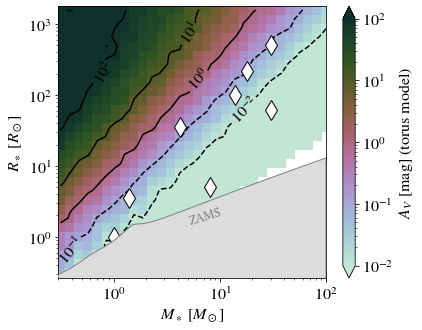

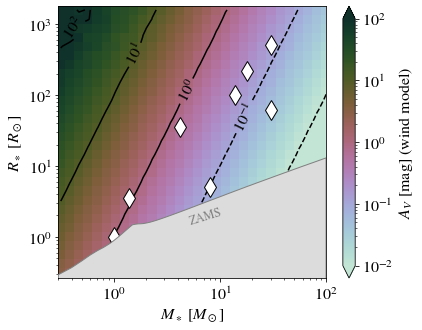

In [19]:
Avq = dd.io.load('Avq.h5')

from matplotlib.colors import LogNorm

mycm = sns.cubehelix_palette(8,start=0.,rot=-1.5,as_cmap=True) #sns.color_palette("mako_r", as_cmap=True)


plt.figure(facecolor='white')
im=plt.pcolormesh(Avq["mm"]/c.msun,Avq["rr"]/c.rsun,Avq['Avt'],
                  cmap=mycm,
                  norm=LogNorm(vmin=1.e-2,vmax=1e2),
                 rasterized=True,shading='nearest')
cs=plt.contour(Avq["mm"]/c.msun,Avq["rr"]/c.rsun,np.log10(Avq['Avt']),levels=np.linspace(-2,2,5),colors='k')
plt.loglog()
cb = plt.colorbar(im,label='$A_V$ [mag] (torus model)',extend='both')
cb.solids.set_rasterized(True)
plt.xlabel(r'$M_\ast$ $[M_\odot]$')
plt.ylabel(r'$R_\ast$ $[R_\odot]$')
plt.xlim(0.3,100)
plt.clabel(cs,fmt=' $10^{%i}$',use_clabeltext=True,inline_spacing=0)
plt.fill_between(zams['star_mass'],10**zams['log_R'],0,zorder=10,color='Gainsboro',edgecolor='grey')
plt.annotate('ZAMS',(5.,1.5),color='grey',fontsize=12,rotation=17,zorder=11)

sel = (lrn['Ms']>0) & (lrn['Rs']>0)
plt.plot(lrn[sel]['Ms'],lrn[sel]['Rs'],'d',markersize=14,
         markerfacecolor='w',markeredgecolor='k')


plt.savefig('dustfigs/Avt_MR.pdf',bbox_inches='tight',dpi=200)



plt.figure()
im=plt.pcolormesh(Avq["mm"]/c.msun,Avq["rr"]/c.rsun,Avq['Avw'],
                  cmap=mycm,
                  norm=LogNorm(vmin=1.e-2,vmax=1e2),
                 rasterized=True,shading='nearest')
cs=plt.contour(Avq["mm"]/c.msun,Avq["rr"]/c.rsun,np.log10(Avq['Avw']),levels=np.linspace(-2,2,5),colors='k')
plt.loglog()
cb = plt.colorbar(im,label='$A_V$ [mag] (wind model)',extend='both')
cb.solids.set_rasterized(True)
plt.xlabel(r'$M_\ast$ $[M_\odot]$')
plt.ylabel(r'$R_\ast$ $[R_\odot]$')
plt.xlim(0.3,100)
plt.clabel(cs,fmt=' $10^{%i}$',use_clabeltext=True,inline_spacing=0)
plt.fill_between(zams['star_mass'],10**zams['log_R'],0,zorder=10,color='Gainsboro',edgecolor='grey')
plt.annotate('ZAMS',(5.,1.5),color='grey',fontsize=12,rotation=17,zorder=11)


sel = (lrn['Ms']>0) & (lrn['Rs']>0)
plt.plot(lrn[sel]['Ms'],lrn[sel]['Rs'],'d',markersize=14,
         markerfacecolor='w',markeredgecolor='k')

plt.savefig('dustfigs/Avw_MR.pdf',bbox_inches='tight',dpi=200)



# HRD

In [20]:
eep1 = read_mist_models.EEP('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep')
eep2 = read_mist_models.EEP('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00200M.track.eep')
#eep3 = read_mist_models.EEP('MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00300M.track.eep')
eep4 = read_mist_models.EEP('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep')
#eep6 = read_mist_models.EEP('MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00600M.track.eep')
eep8 = read_mist_models.EEP('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00800M.track.eep')
#eep10 = read_mist_models.EEP('MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/01000M.track.eep')
eep16 = read_mist_models.EEP('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/01600M.track.eep')
eepl = [eep1,eep2,eep4,eep8,eep16]

Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00200M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00400M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00800M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/01600M.track.eep


In [21]:
qzams = 1/3.
skip = 1

def Avt_model(Ms,Rs,q):
    return 0.18*(q/0.1)**1.6 * (Ms/c.msun)**-2.8 * (Rs/(10*c.rsun))**1.8  #*((c.G*Ms*Ms/Rs)/1e47)**-1.5

def Avw_model(Ms,Rs,q,fvir,vwf):
    return 0.97*(q/0.1)**1.04  * (Ms/c.msun)**-1.5 * (Rs/(10*c.rsun))**0.5 * (fvir/0.25)**-2.5 * (vwf/0.25)**0.5 #(np.sqrt(c.G*Ms/Rs)/1.e7) *((c.G*Ms*Ms/Rs)/1e47)**-1

In [22]:
HRD_data = []
for eep in eepl:
    sel = (eep.eeps['phase']>=0)& (eep.eeps['phase']<6) # MS -> AGB
    ms = eep.eeps[sel]['star_mass'][::skip]*c.msun
    rs = (10**eep.eeps[sel]['log_R'])[::skip]*c.rsun
    Ts = eep.eeps[sel]['log_Teff'][::skip]
    Ls = eep.eeps[sel]['log_L'][::skip]
    ma = qzams*ms[0]
    #Avw = Av_wind(ms,rs,ma,kappa_dust=1.e3,X_dust_max=5.e-3,vwf=0.25,fvir=0.25)
    #Avt = Av_torus(ms,rs,ma,kappa_dust=1.e3,X_dust_max=5.e-3)
    
    Avw = Avw_model(ms,rs,ma/ms,0.25,0.25)
    Avt = Avt_model(ms,rs,ma/ms)
    
    trackAv = {'ms':ms,'rs':rs,'Ts':Ts,'Ls':Ls,'ma':ma,'Avw':Avw,'Avt':Avt}
    HRD_data.append(trackAv)

dd.io.save("HRD_data.h5",HRD_data)

/Users/morganmacleod/anaconda3/lib/python3.8/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):


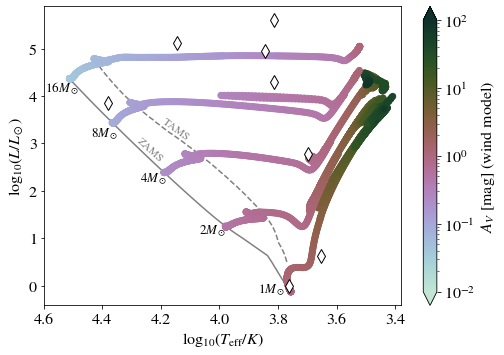

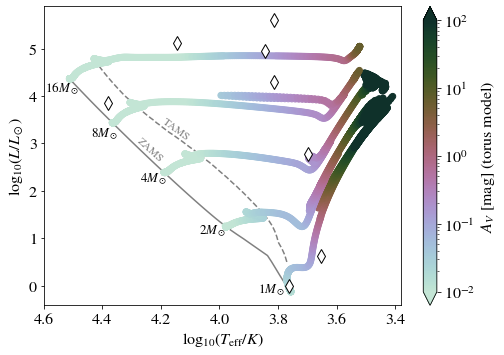

In [23]:
dd.io.load("HRD_data.h5")

#mycm = sns.color_palette("mako_r", as_cmap=True)
mycm = sns.cubehelix_palette(8,start=0.,rot=-1.5,as_cmap=True)

plt.figure(figsize=(8,5.5))
sel = (zams['star_mass']>=1.0) & (zams['star_mass']<=16.0)
plt.plot(zams[sel]['log_Teff'],zams[sel]['log_L'],'-',zorder=0,color='grey')
plt.plot(tams[sel]['log_Teff'],tams[sel]['log_L'],'--',zorder=0,color='grey')
plt.annotate('ZAMS',(4.285,2.63),color='grey',fontsize=11,rotation=-42)
plt.annotate('TAMS',(4.2,3.08),color='grey',fontsize=11,rotation=-36)

plt.annotate(r'$1M_\odot$',(3.87,-0.15),color='k',fontsize=13)
plt.annotate(r'$2M_\odot$',(4.07,1.09),color='k',fontsize=13)
plt.annotate(r'$4M_\odot$',(4.27,2.19),color='k',fontsize=13)
plt.annotate(r'$8M_\odot$',(4.44,3.15),color='k',fontsize=13)
plt.annotate(r'$16M_\odot$',(4.595,4.1),color='k',fontsize=13)


for hr in HRD_data:
    plt.scatter(hr['Ts'],hr['Ls'],c=hr['Avw'],cmap=mycm,rasterized=True,
                norm=LogNorm(vmin=1.e-2,vmax=1e2)
               )

cb=plt.colorbar(label=r'$A_V$ [mag] (wind model)',extend='both')
cb.solids.set_rasterized(True)
plt.xlim(4.6,3.38)
plt.xlabel(r"$\log_{10}\left(T_{\rm eff}/K\right)$")
plt.ylabel(r"$\log_{10}\left(L/L_\odot\right)$")

sel = (lrn['Ls']>0) & (lrn['Teff']>0)
plt.plot(np.log10(lrn[sel]['Teff']),np.log10(lrn[sel]['Ls']),'d',markersize=10,
         markerfacecolor='w',markeredgecolor='k')


plt.savefig('dustfigs/HRD_Avw.pdf',bbox_inches='tight',dpi=200)


plt.figure(figsize=(8,5.5))
sel = (zams['star_mass']>=1.0) & (zams['star_mass']<=16.0)
plt.plot(zams[sel]['log_Teff'],zams[sel]['log_L'],'-',zorder=0,color='grey')
plt.plot(tams[sel]['log_Teff'],tams[sel]['log_L'],'--',zorder=0,color='grey')
plt.annotate('ZAMS',(4.285,2.63),color='grey',fontsize=11,rotation=-42)
plt.annotate('TAMS',(4.2,3.08),color='grey',fontsize=11,rotation=-36)

plt.annotate(r'$1M_\odot$',(3.87,-0.15),color='k',fontsize=13)
plt.annotate(r'$2M_\odot$',(4.07,1.09),color='k',fontsize=13)
plt.annotate(r'$4M_\odot$',(4.27,2.19),color='k',fontsize=13)
plt.annotate(r'$8M_\odot$',(4.44,3.15),color='k',fontsize=13)
plt.annotate(r'$16M_\odot$',(4.595,4.1),color='k',fontsize=13)



for hr in HRD_data:
    plt.scatter(hr['Ts'],hr['Ls'],c=hr['Avt'],cmap=mycm,rasterized=True,
                norm=LogNorm(vmin=1.e-2,vmax=1e2)
               )
    

cb=plt.colorbar(label=r'$A_V$ [mag] (torus model)',extend='both')
cb.solids.set_rasterized(True)
plt.xlim(4.6,3.38)
plt.xlabel(r"$\log_{10}\left(T_{\rm eff}/K\right)$")
plt.ylabel(r"$\log_{10}\left(L/L_\odot\right)$")

sel = (lrn['Ls']>0) & (lrn['Teff']>0)
plt.plot(np.log10(lrn[sel]['Teff']),np.log10(lrn[sel]['Ls']),'d',markersize=10,
         markerfacecolor='w',markeredgecolor='k')

plt.savefig('dustfigs/HRD_Avt.pdf',bbox_inches='tight',dpi=200)


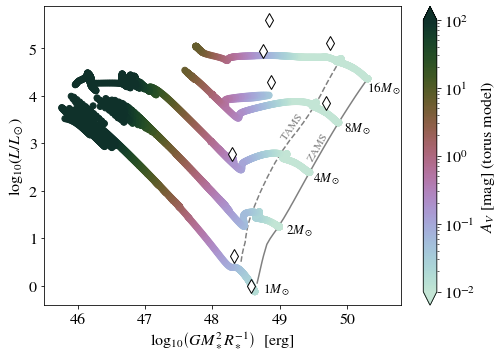

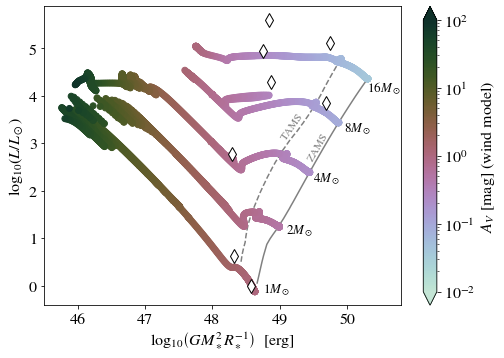

In [24]:
zams['log_Ebind']=np.log10(c.G*(zams['star_mass']*c.msun)**2/(c.rsun*10**zams['log_R']))
tams['log_Ebind']=np.log10(c.G*(tams['star_mass']*c.msun)**2/(c.rsun*10**tams['log_R']))


plt.figure(figsize=(8,5.5))
sel = (zams['star_mass']>=1.0) & (zams['star_mass']<=16.0)
plt.plot(zams[sel]['log_Ebind'],zams[sel]['log_L'],'-',zorder=0,color='grey')
plt.plot(tams[sel]['log_Ebind'],tams[sel]['log_L'],'--',zorder=0,color='grey')
plt.annotate('ZAMS',(49.4,2.65),color='grey',fontsize=11,rotation=60)
plt.annotate('TAMS',(49,3.08),color='grey',fontsize=11,rotation=55)

plt.annotate(r'$1M_\odot$',(48.75,-0.15),color='k',fontsize=13)
plt.annotate(r'$2M_\odot$',(49.1,1.09),color='k',fontsize=13)
plt.annotate(r'$4M_\odot$',(49.5,2.19),color='k',fontsize=13)
plt.annotate(r'$8M_\odot$',(49.95,3.25),color='k',fontsize=13)
plt.annotate(r'$16M_\odot$',(50.3,4.1),color='k',fontsize=13)



for hr in HRD_data:
    plt.scatter(np.log10(c.G*hr['ms']**2/hr['rs']),hr['Ls'],c=hr['Avt'],cmap=mycm,rasterized=True,
                norm=LogNorm(vmin=1.e-2,vmax=1e2)
               )
    

cb=plt.colorbar(label=r'$A_V$ [mag] (torus model)',extend='both')
cb.solids.set_rasterized(True)
plt.xlim(45.5,50.8)
plt.xlabel(r"$\log_{10}\left(GM_\ast^2 R_\ast^{-1}\right)$  [erg]")
plt.ylabel(r"$\log_{10}\left(L/L_\odot\right)$")

sel = (lrn['Ls']>0) & (lrn['Teff']>0)
plt.plot(np.log10(c.G*(lrn[sel]['Ms']*c.msun)**2/(lrn[sel]['Rs']*c.rsun)),np.log10(lrn[sel]['Ls']),'d',markersize=10,
         markerfacecolor='w',markeredgecolor='k')

plt.savefig('dustfigs/HRD_Ebind_Avt.pdf',bbox_inches='tight',dpi=200)




plt.figure(figsize=(8,5.5))
sel = (zams['star_mass']>=1.0) & (zams['star_mass']<=16.0)
plt.plot(zams[sel]['log_Ebind'],zams[sel]['log_L'],'-',zorder=0,color='grey')
plt.plot(tams[sel]['log_Ebind'],tams[sel]['log_L'],'--',zorder=0,color='grey')
plt.annotate('ZAMS',(49.4,2.65),color='grey',fontsize=11,rotation=60)
plt.annotate('TAMS',(49,3.08),color='grey',fontsize=11,rotation=55)

plt.annotate(r'$1M_\odot$',(48.75,-0.15),color='k',fontsize=13)
plt.annotate(r'$2M_\odot$',(49.1,1.09),color='k',fontsize=13)
plt.annotate(r'$4M_\odot$',(49.5,2.19),color='k',fontsize=13)
plt.annotate(r'$8M_\odot$',(49.95,3.25),color='k',fontsize=13)
plt.annotate(r'$16M_\odot$',(50.3,4.1),color='k',fontsize=13)



for hr in HRD_data:
    plt.scatter(np.log10(c.G*hr['ms']**2/hr['rs']),hr['Ls'],c=hr['Avw'],cmap=mycm,rasterized=True,
                norm=LogNorm(vmin=1.e-2,vmax=1e2)
               )
    

cb=plt.colorbar(label=r'$A_V$ [mag] (wind model)',extend='both')
cb.solids.set_rasterized(True)
plt.xlim(45.5,50.8)
plt.xlabel(r"$\log_{10}\left(GM_\ast^2 R_\ast^{-1}\right)$  [erg]")
plt.ylabel(r"$\log_{10}\left(L/L_\odot\right)$")

sel = (lrn['Ls']>0) & (lrn['Teff']>0)
plt.plot(np.log10(c.G*(lrn[sel]['Ms']*c.msun)**2/(lrn[sel]['Rs']*c.rsun)),np.log10(lrn[sel]['Ls']),'d',markersize=10,
         markerfacecolor='w',markeredgecolor='k')

plt.savefig('dustfigs/HRD_Ebind_Avw.pdf',bbox_inches='tight',dpi=200)


# Fraction IR transients

In [26]:
filelist = sorted(glob.glob('../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/0[0-9][0-9][0-9]0M.track.eep'))[9:54]
HRD_data_all = []
for fn in filelist:
    eep = read_mist_models.EEP(fn)
    sel = (eep.eeps['phase']>=0)& (eep.eeps['phase']<6) # MS -> AGB
    ms = eep.eeps[sel]['star_mass'][::skip]*c.msun
    rs = (10**eep.eeps[sel]['log_R'])[::skip]*c.rsun
    Ts = eep.eeps[sel]['log_Teff'][::skip]
    Ls = eep.eeps[sel]['log_L'][::skip]
    ma = qzams*ms[0]
    #Avw = Av_wind(ms,rs,ma,kappa_dust=1.e3,X_dust_max=5.e-3,vwf=0.25,fvir=0.25)
    #Avt = Av_torus(ms,rs,ma,kappa_dust=1.e3,X_dust_max=5.e-3)
    
    Avw = Avw_model(ms,rs,ma/ms,0.25,0.25)
    Avt = Avt_model(ms,rs,ma/ms)
    
    trackAv = {'ms':ms,'rs':rs,'Ts':Ts,'Ls':Ls,'ma':ma,'Avw':Avw,'Avt':Avt}
    HRD_data_all.append(trackAv)

dd.io.save("HRD_data_all.h5",HRD_data_all)

Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00100M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00110M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00120M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00130M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00140M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00150M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00160M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00170M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00180M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00190M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00200M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00210M.track.eep
Reading in: ../MIST_v1.2_feh_p0.00_afe_p0.0_vvcrit0.0_EEPS/00220M.track.eep
Reading in: 

----------------
ms= 0.9999973742716833
r(zams)= 0.883585204491293 r(max)= 352.302437884875
r(Avw5)= 16.876932517711218 r(Avt5)= 21.667742027549348
Opt/Tot (wind) =  0.0 IR/Tot (wind) = 0.5074167612773933
Opt/Tot (torus) =  0.3864608502443102 IR/Tot (torus) = 0.46568895316758424
----------------
ms= 1.0999970545381201
r(zams)= 0.991485670080817 r(max)= 366.5361442325901
r(Avw5)= 23.586723692762632 r(Avt5)= 22.793030579150653
Opt/Tot (wind) =  0.025905366806009432 IR/Tot (wind) = 0.46399061386273427
Opt/Tot (torus) =  0.39366188753736236 IR/Tot (torus) = 0.46977976043947917
----------------
ms= 1.1999966998432845
r(zams)= 1.1091814056919573 r(max)= 396.52914608571524
r(Avw5)= 36.64848610620701 r(Avt5)= 26.725504026725883
Opt/Tot (wind) =  0.05117043047130759 IR/Tot (wind) = 0.40505628035402147
Opt/Tot (torus) =  0.3893750500262566 IR/Tot (torus) = 0.4587638783349161
----------------
ms= 1.299996347913532
r(zams)= 1.2321790482242287 r(max)= 418.78332021907744
r(Avw5)= 41.42295951344047 r

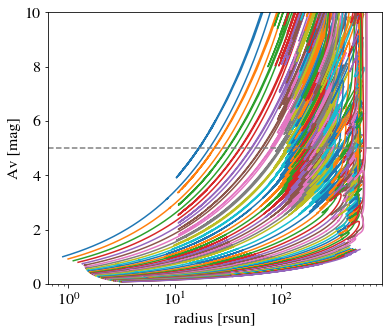

In [27]:
HRD_data_all = dd.io.load("HRD_data_all.h5")

irof = []
for hr in HRD_data_all:
    plt.plot(hr['rs']/c.rsun,hr['Avw'])
    
    iavw5 = np.argmin(np.abs(hr['Avw']-5))
    iavt5 = np.argmin(np.abs(hr['Avt']-5))
    iavw1 = np.argmin(np.abs(hr['Avw']-1))
    iavt1 = np.argmin(np.abs(hr['Avt']-1))
    print("----------------\nms=",hr['ms'][0]/c.msun)
    print("r(zams)=",hr['rs'][0]/c.rsun,"r(max)=",np.max(hr['rs'])/c.rsun)
    print("r(Avw5)=",hr['rs'][iavw5]/c.rsun,"r(Avt5)=",hr['rs'][iavt5]/c.rsun)
    dexOptW = np.log10(hr['rs'][iavw1])-np.log10(hr['rs'][0])
    dexOptT = np.log10(hr['rs'][iavt1])-np.log10(hr['rs'][0])
    dexIntW  = np.log10(hr['rs'][iavw5])-np.log10(hr['rs'][iavw1])
    dexIntT  = np.log10(hr['rs'][iavt5])-np.log10(hr['rs'][iavt1])
    dexIRW  = np.log10(np.max(hr['rs']))-np.log10(hr['rs'][iavw5])
    dexIRT  = np.log10(np.max(hr['rs']))-np.log10(hr['rs'][iavt5])
    
    
    print("Opt/Tot (wind) = ",dexOptW/(dexOptW+dexIntW+dexIRW),"IR/Tot (wind) =",dexIRW/(dexOptW+dexIntW+dexIRW))
    print("Opt/Tot (torus) = ",dexOptT/(dexOptT+dexIntT+dexIRT),"IR/Tot (torus) =",dexIRT/(dexOptT+dexIntT+dexIRT))
    irof.append([hr['ms'][0]/c.msun,
                 hr['rs'][0]/c.rsun,
                 np.max(hr['rs'])/c.rsun,
                 hr['rs'][iavw5]/c.rsun,
                 hr['rs'][iavt5]/c.rsun,
                 dexOptW/(dexOptW+dexIntW+dexIRW),
                 dexOptT/(dexOptT+dexIntT+dexIRT),
                 dexIntW/(dexOptW+dexIntW+dexIRW),
                 dexIntT/(dexOptT+dexIntT+dexIRT),
                 dexIRW/(dexOptW+dexIntW+dexIRW),
                 dexIRT/(dexOptT+dexIntT+dexIRT)])
    
    
plt.ylim(0,10)
plt.xscale('log')
plt.axhline(5,color='grey',ls='--')
plt.xlabel('radius [rsun]')
plt.ylabel("Av [mag]")

irof = Table(np.array(irof),names=['mzams','rzams','rmax','r5w','r5t','ofw','oft','rfw','rft','ifw','ift'])

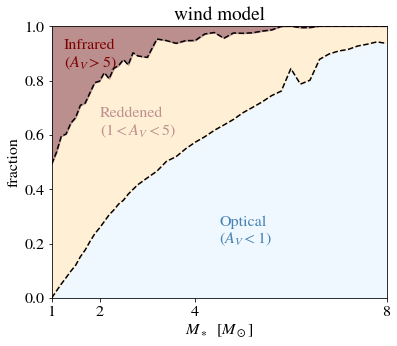

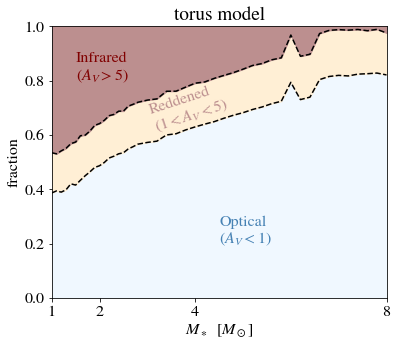

In [29]:
plt.figure()
plt.plot(irof['mzams'],irof['ofw'],'k--')
plt.plot(irof['mzams'],irof['ofw']+irof['rfw'],'k--')
plt.fill_between(irof['mzams'],0,irof['ofw'],color='AliceBlue')
plt.fill_between(irof['mzams'],irof['ofw'],irof['ofw']+irof['rfw'],color='PapayaWhip')
plt.fill_between(irof['mzams'],irof['ofw']+irof['rfw'],irof['ofw']+irof['rfw']+irof['ifw'],color='RosyBrown')


#ax.set_xscale('log')
plt.ylim(0,1)
plt.xlim(1,8)
plt.xticks(ticks=[1,2,4,8])
plt.xlabel(r"$M_\ast \ \ [M_\odot]$")
plt.ylabel('fraction')
plt.annotate('Infrared\n$(A_V>5)$',(1.25,0.85),color='Maroon')
plt.annotate('Reddened\n$(1<A_V<5)$',(2,0.6),color='RosyBrown')
plt.annotate('Optical\n$(A_V<1)$',(4.5,0.2),color='SteelBlue')
plt.title('wind model')
plt.savefig('dustfigs/fIRw.pdf',bbox_inches='tight',dpi=200)







plt.figure()
plt.plot(irof['mzams'],irof['oft'],'k--')
plt.plot(irof['mzams'],irof['oft']+irof['rft'],'k--')
plt.fill_between(irof['mzams'],0,irof['oft'],color='AliceBlue')
plt.fill_between(irof['mzams'],irof['oft'],irof['oft']+irof['rft'],color='PapayaWhip')
plt.fill_between(irof['mzams'],irof['oft']+irof['rft'],irof['oft']+irof['rft']+irof['ift'],color='RosyBrown')

#ax.set_xscale('log')
plt.ylim(0,1)
plt.xlim(1,8)
plt.xticks(ticks=[1,2,4,8])
plt.xlabel(r"$M_\ast \ \ [M_\odot]$")
plt.ylabel('fraction')
plt.annotate('Infrared\n$(A_V>5)$',(1.5,0.8),color='Maroon')
plt.annotate('Reddened\n$(1<A_V<5)$',(3,0.615),color='RosyBrown',rotation=18)
plt.annotate('Optical\n$(A_V<1)$',(4.5,0.2),color='SteelBlue')
plt.title('torus model')
plt.savefig('dustfigs/fIRt.pdf',bbox_inches='tight',dpi=200)

In [30]:
# WEIGHTING BY M^-1.6
print( "optical fraction (wind): ", np.sum(irof['ofw']*irof['mzams']**-1.6)/np.sum(irof['mzams']**-1.6) )
print( "reddened fraction (wind): ", np.sum(irof['rfw']*irof['mzams']**-1.6)/np.sum(irof['mzams']**-1.6) )
print( "IR fraction (wind): ", np.sum(irof['ifw']*irof['mzams']**-1.6)/np.sum(irof['mzams']**-1.6) )

print( "optical fraction (torus):", np.sum(irof['oft']*irof['mzams']**-1.6)/np.sum(irof['mzams']**-1.6) )
print( "reddened fraction (torus):", np.sum(irof['rft']*irof['mzams']**-1.6)/np.sum(irof['mzams']**-1.6) )
print( "IR fraction (torus):", np.sum(irof['ift']*irof['mzams']**-1.6)/np.sum(irof['mzams']**-1.6) )

optical fraction (wind):  0.2540136098549435
reddened fraction (wind):  0.4836653216627478
IR fraction (wind):  0.26232106848230874
optical fraction (torus): 0.48907552249123837
reddened fraction (torus): 0.15312073556943495
IR fraction (torus): 0.35780374193932657
